# Housing Price Prediction

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('train_test.csv')
df1=pd.read_csv('test.csv')

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [4]:
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal


In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [6]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [7]:
df.shape

(1168, 81)

There are 1168 rows and 81 columns.

In [8]:
df1.shape

(292, 80)

There are 292 rows and 80 columns.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

# DataFrame Description

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not

This is a regression type of problem with our target variable being 'SalePrice'. 

# Checking Null Values

In [11]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Heatmap for the representstion of null values

<AxesSubplot:>

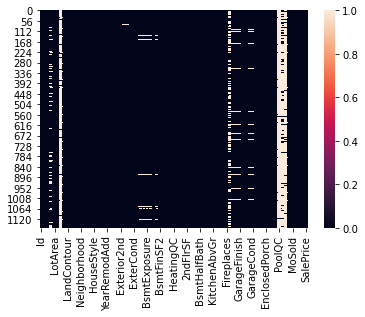

In [12]:
sns.heatmap(df.isnull())

There are null values present in our train data set which can be seen with the heat map above.
These null values have to be treated.

In [13]:
df1.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

Heatmap for the representstion of null values

<AxesSubplot:>

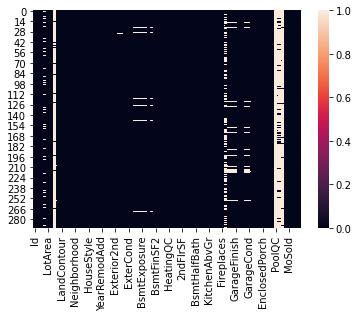

In [14]:
sns.heatmap(df1.isnull())

There are null values present in our test data set which can be seen with the heat map above. These null values have to be treated.

In [15]:
##Check null values if any(column wise: missing value percentage)
missing_val_cols_prcnt = round(100*df.isnull().sum()/len(df.index),2)
missing = pd.DataFrame(missing_val_cols_prcnt[missing_val_cols_prcnt!=0])
missing

,0
LotFrontage,18.32
Alley,93.41
MasVnrType,0.60
MasVnrArea,0.60
BsmtQual,2.57
BsmtCond,2.57
BsmtExposure,2.65
BsmtFinType1,2.57
BsmtFinType2,2.65
FireplaceQu,47.17


In [16]:
#missing values dataframe (sorting values for graph)
my_cols = missing.index
vals = missing[0]
missing_df = pd.DataFrame({'features':my_cols,'percent':vals})
missing_df = missing_df.sort_values(by='percent', ascending=False)

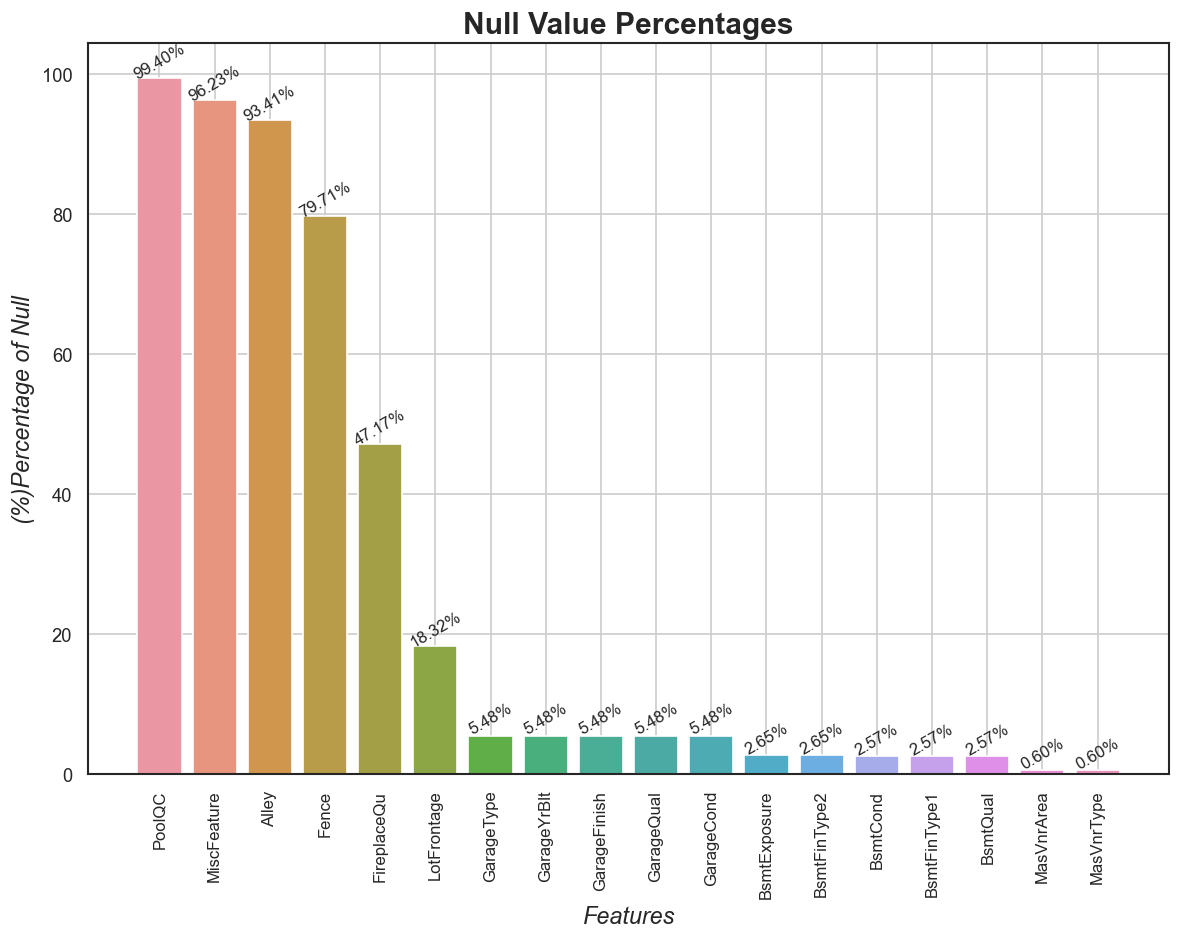

In [17]:
##'Null Values Percentages' in the housing dataset, df: Barplot
sns.set(style='white')
plt.figure(figsize=(10,8), dpi=120)
ax_x= sns.barplot(x=missing_df.features, y=missing_df.percent)

for p in ax_x.patches:
    ax_x.annotate(format(p.get_height(), '.2f')+"%", (p.get_x() + p.get_width() / 2.\
                                                    , p.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize =10, rotation=30)
plt.xticks(rotation=90, fontsize=10)        
plt.xlabel('Features', fontsize= 14, fontstyle='italic')
plt.ylabel('(%)Percentage of Null' , fontsize= 14, fontstyle='italic')
plt.title('Null Value Percentages', fontsize=18,fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.autoscale()
plt.show()

Missing values encountered in the above mentioned columns and their respective percentages. But there are some columns that do have meaningful missing. Let's inspect them.

In [18]:
##Inspecting null values in the categorical columns (only object types).

cat_obj_null_cols = df.select_dtypes(include='object')   #Retaining only object types categorical columns and their null value %
missing_cat_obj_null_prcnt = round(100*cat_obj_null_cols.isnull().sum()/len(cat_obj_null_cols.index),2)
missing_cat_obj_null_prcnt = missing_cat_obj_null_prcnt[missing_cat_obj_null_prcnt!=0]
missing_cat_obj_null_prcnt

Alley           93.41
MasVnrType       0.60
BsmtQual         2.57
BsmtCond         2.57
BsmtExposure     2.65
BsmtFinType1     2.57
BsmtFinType2     2.65
FireplaceQu     47.17
GarageType       5.48
GarageFinish     5.48
GarageQual       5.48
GarageCond       5.48
PoolQC          99.40
Fence           79.71
MiscFeature     96.23
dtype: float64

In [19]:
##Considering the aspect of 'meaningful missing'. Replace nulls with 'None' where null implies absence of feature (from data dictionary)

cat_null_obj_cols = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature','Electrical']
for column in cat_null_obj_cols:
    df[column]= df[column].fillna('None')

In [20]:
##Inspecting null values in the categorical columns (only object types).

cat_obj_null_cols = df.select_dtypes(include='object')   #Retaining only object types categorical columns
missing_cat_obj_null_prcnt = round(100*cat_obj_null_cols.isnull().sum()/len(cat_obj_null_cols.index),2)
missing_cat_obj_null_prcnt = missing_cat_obj_null_prcnt[missing_cat_obj_null_prcnt!=0]
missing_cat_obj_null_prcnt

Series([], dtype: float64)

Dealing with data imbalance (categorical variables: object): Removing (object) categorical features that have more than 80% data associated to one single value.

In [21]:
##Removing categorical features that have more than 80% data associated to one single value.

def get_cols_imbal(data, prcnt):
    df1= data.copy()
    my_list= []
    cat_obj_cols = df1.select_dtypes(include=['object'])
    for col in (cat_obj_cols):
        if(df1[col].value_counts().max() > int(prcnt*len(df1.index)/100)):
            my_list.append(col)
    return my_list

##Removing the skewed data
columns_to_be_removed = get_cols_imbal(data=df, prcnt=80)  
print("Categorical object type columns removed:",columns_to_be_removed)
print("\nNumber of categorical object type columns removed: ", len(columns_to_be_removed),"\n")

##Dropping columns with skewed data (object type categorical variables)
df = df.drop(columns_to_be_removed, axis=1)
df.head()

Categorical object type columns removed: ['Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'MiscFeature', 'SaleType', 'SaleCondition']

Number of categorical object type columns removed:  23 



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SalePrice
0,127,120,RL,NaN,4928,IR1,Inside,NPkVill,1Story,6,...,205,0,0,0,0,None,0,2,2007,128000
1,889,20,RL,95.0,15865,IR1,Inside,NAmes,1Story,8,...,207,0,0,224,0,None,0,10,2007,268000
2,793,60,RL,92.0,9920,IR1,CulDSac,NoRidge,2Story,7,...,130,0,0,0,0,None,0,6,2007,269790
3,110,20,RL,105.0,11751,IR1,Inside,NWAmes,1Story,6,...,122,0,0,0,0,MnPrv,0,1,2010,190000
4,422,20,RL,NaN,16635,IR1,FR2,NWAmes,1Story,6,...,0,0,0,0,0,None,0,6,2009,215000


In [22]:
df.shape

(1168, 58)

In [23]:
##Recheck null values in the categorical columns (only object types).

cat_obj_null_cols = df.select_dtypes(include='object')   #Retaining only object types categorical columns
missing_cat_obj_null_prcnt = round(100*cat_obj_null_cols.isnull().sum()/len(cat_obj_null_cols.index),2)
missing_cat_obj_null_prcnt = missing_cat_obj_null_prcnt[missing_cat_obj_null_prcnt!=0]
missing_cat_obj_null_prcnt

Series([], dtype: float64)

No more null values in the categorical variables columns (object type). Also, the data imbalance is taken care of.

In [24]:
##Creating a dataframe 'df_obj_cat' with object type categorical variables
obj_type_cat = df.select_dtypes(include='object').columns
df_obj_cat = df.loc[:,obj_type_cat]
df_obj_cat.head()

,MSZoning,LotShape,LotConfig,Neighborhood,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,Fence
0,RL,IR1,Inside,NPkVill,1Story,Gable,Plywood,Plywood,None,TA,CBlock,Gd,No,ALQ,TA,TA,TA,Attchd,RFn,None
1,RL,IR1,Inside,NAmes,1Story,Flat,Wd Sdng,Wd Sdng,None,Gd,PConc,TA,Gd,ALQ,Ex,Gd,TA,Attchd,Unf,None
2,RL,IR1,CulDSac,NoRidge,2Story,Gable,MetalSd,MetalSd,None,Gd,PConc,Gd,Av,GLQ,Ex,TA,TA,Attchd,Unf,None
3,RL,IR1,Inside,NWAmes,1Story,Hip,Plywood,Plywood,BrkFace,TA,CBlock,Gd,No,BLQ,Ex,TA,TA,Attchd,RFn,MnPrv
4,RL,IR1,FR2,NWAmes,1Story,Gable,CemntBd,CmentBd,Stone,Gd,CBlock,Gd,No,ALQ,Gd,Gd,TA,Attchd,Fin,None


In [25]:
df_obj_cat.columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence'],
      dtype='object')

# Analysing object type categorical variables

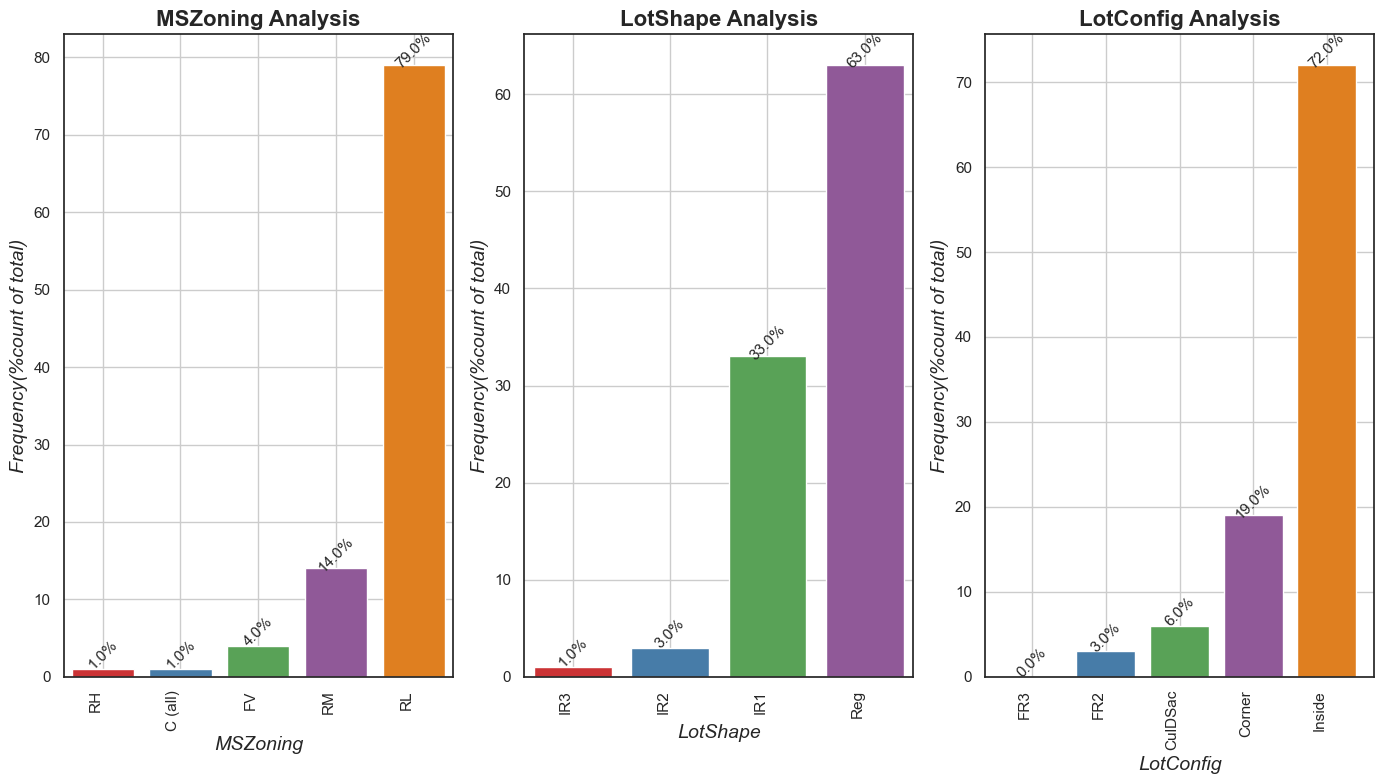

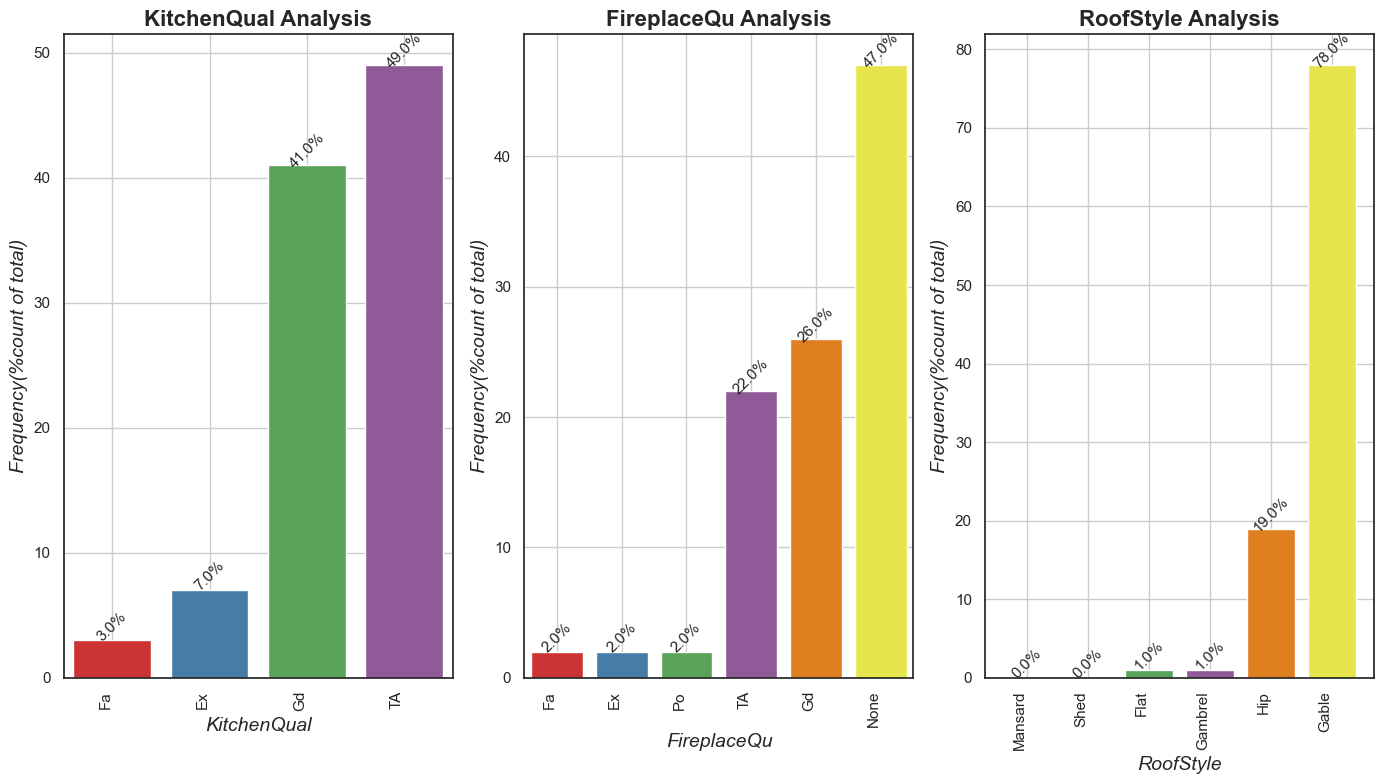

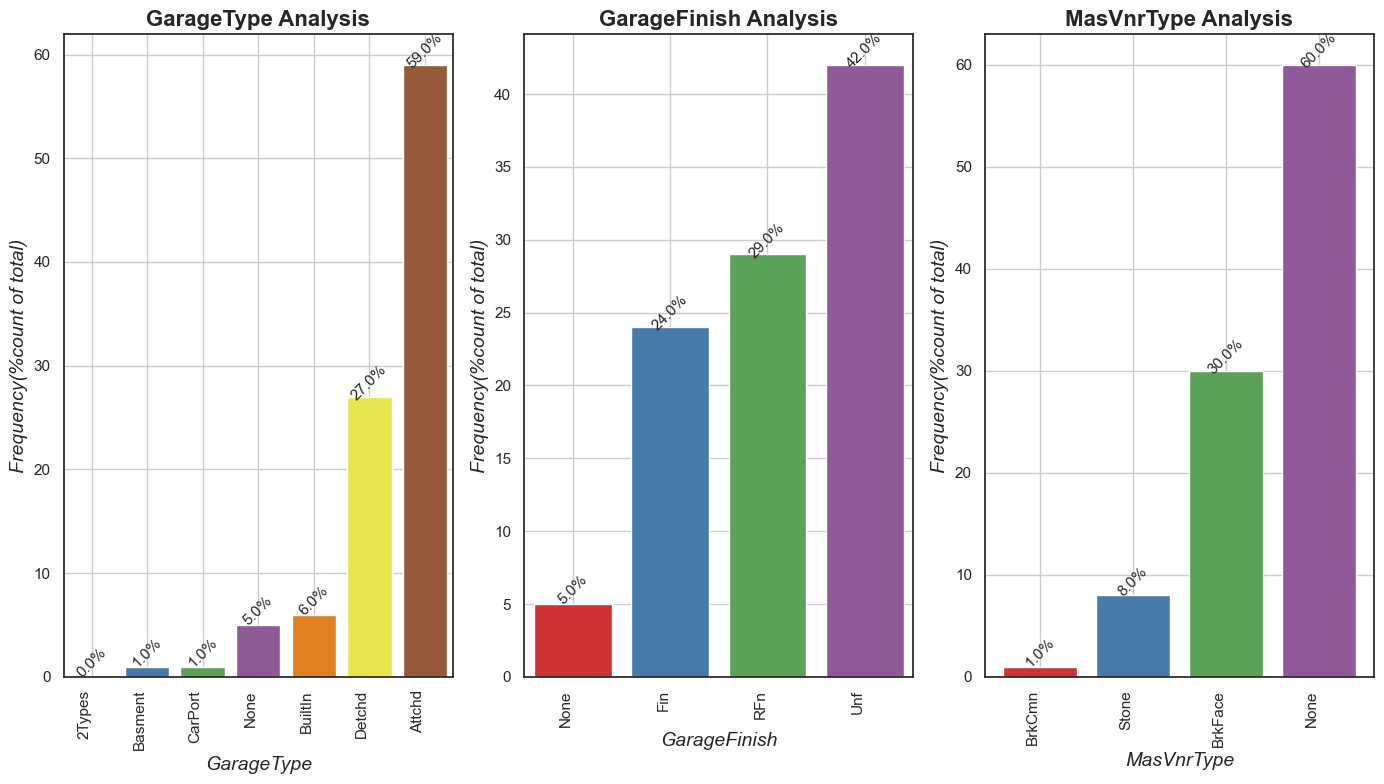

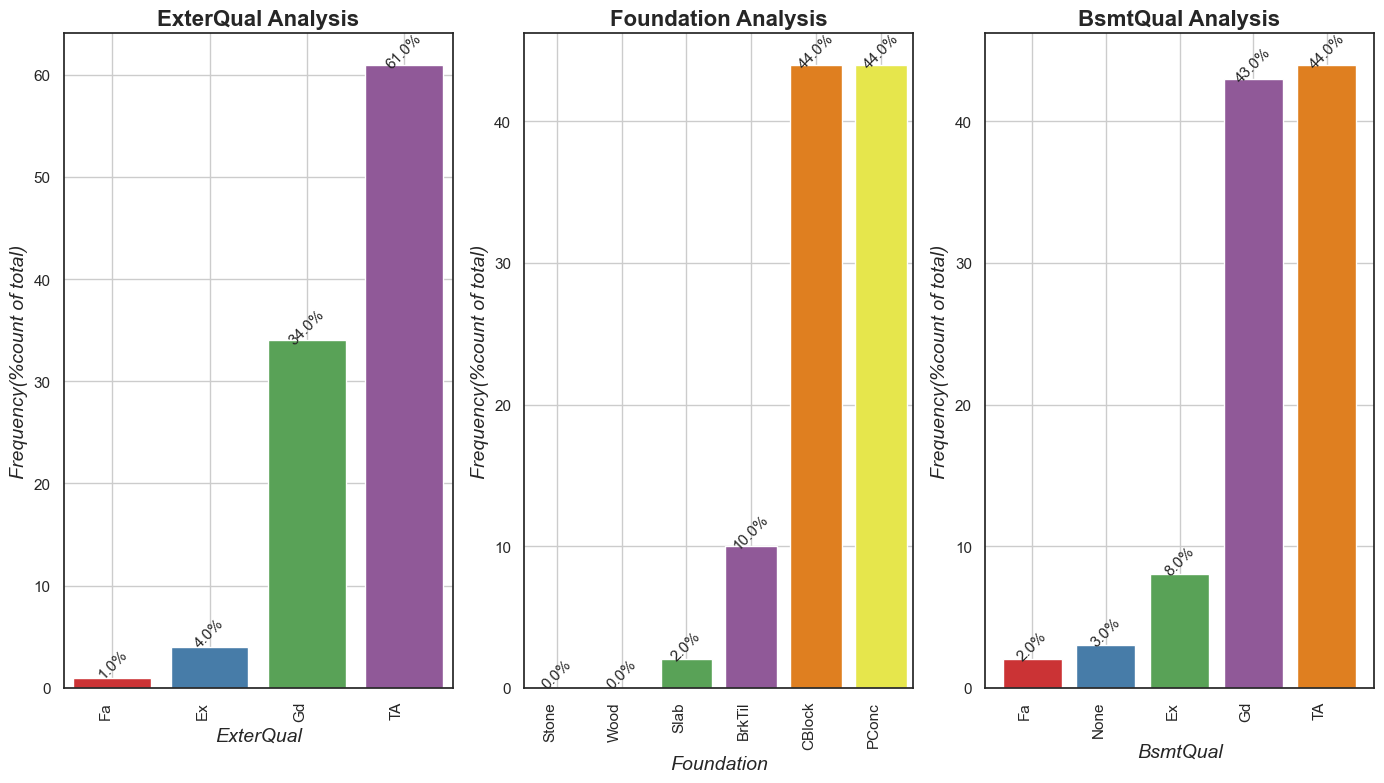

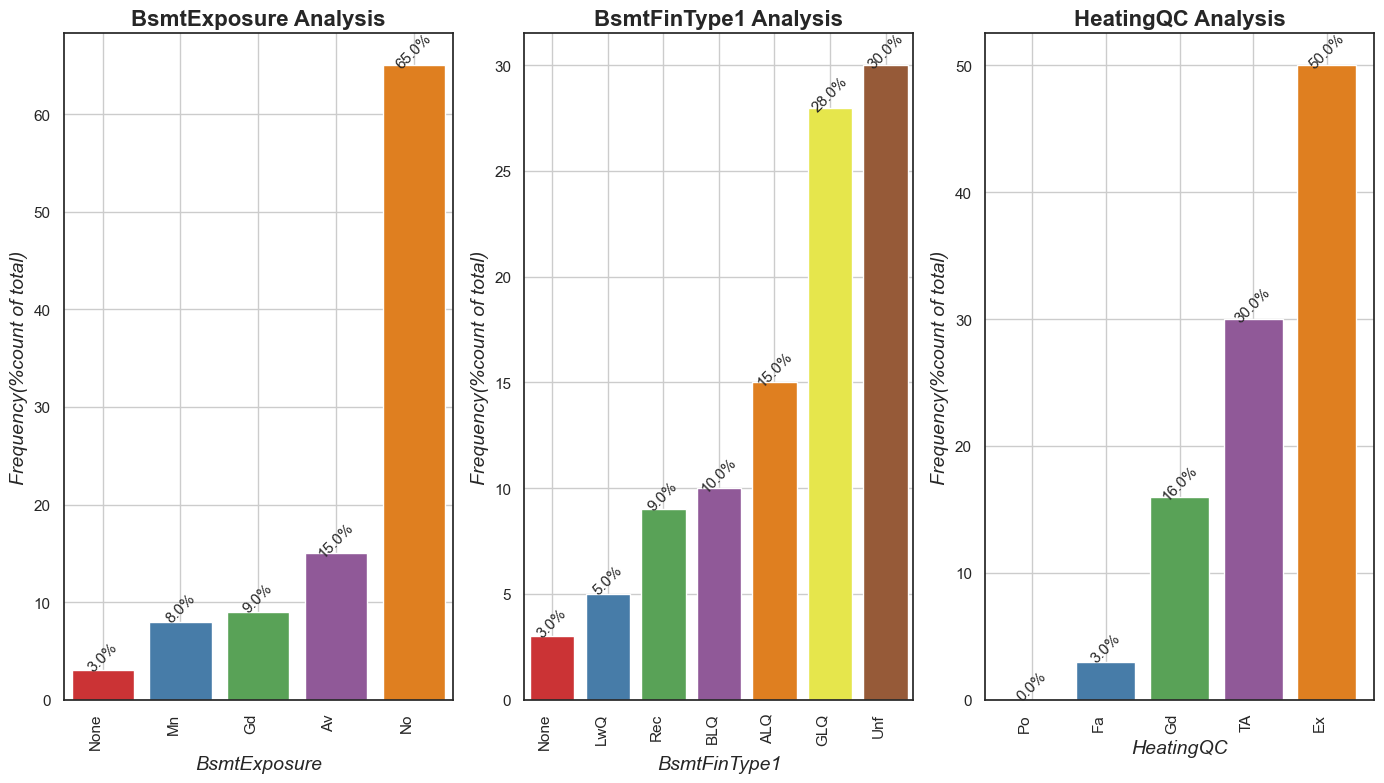

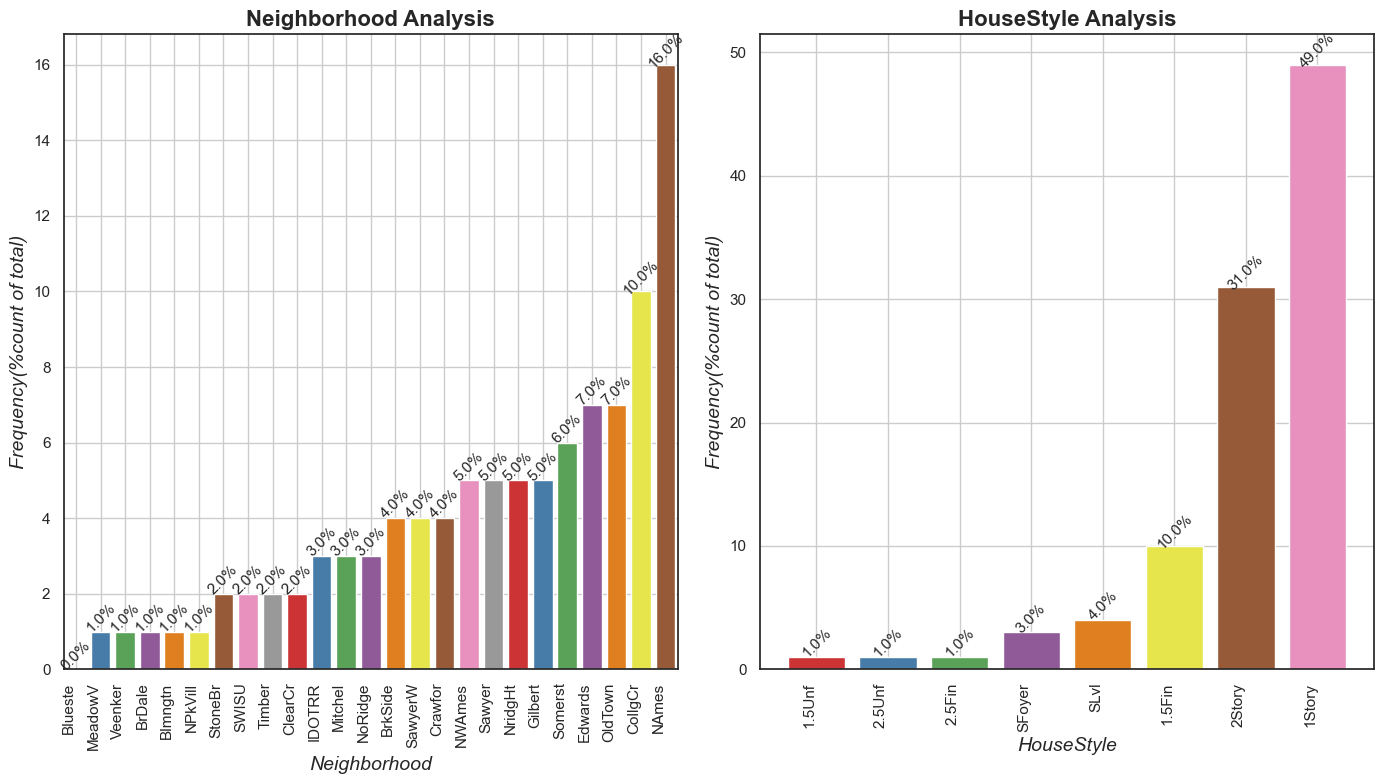

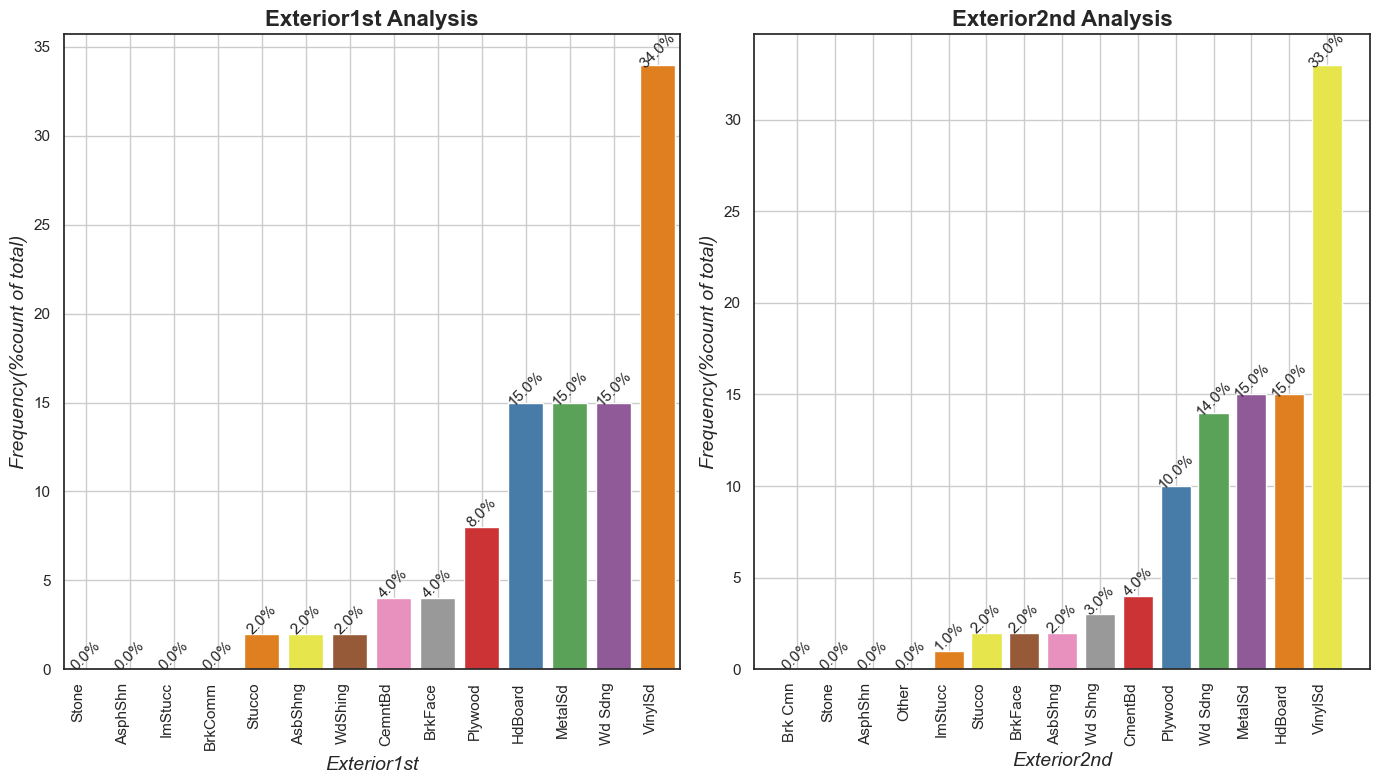

In [26]:
#Creating a function for 'categorical_freq_prcnt_plt'
def categorical_freq_prcnt_plt(data,f1,f2,f3):
    if(f3!=0):
        df= data.copy()
        sns.set(style='white')
        plt.figure(figsize=(14, 8), dpi=100)
        
        plt.subplot(131)  #subplot(131)
        ab = pd.DataFrame((df[f1].value_counts(normalize=True)*100).round(0).sort_values())
        ab.reset_index(inplace=True)
        ab1 = sns.barplot(x='index',y=f1, data=ab, palette='Set1')
        
        plt.setp(ab1.get_xticklabels(), rotation=90, horizontalalignment='right')
        plt.xlabel(f1, fontsize= 14, fontstyle='italic')
        plt.ylabel('Frequency(%count of total)', fontsize= 14, fontstyle='italic')
        plt.title(f1+' Analysis', fontsize=16, fontweight='bold')
        plt.grid(True)
        
        for i in ab1.patches:
            ab1.annotate(format(i.get_height())+"%", (i.get_x() + i.get_width() / 2.\
                                                         , i.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points',rotation=45, fontsize=11)
        
        plt.subplot(132)  #subplot(132)
        cn = pd.DataFrame((df[f2].value_counts(normalize=True)*100).round(0).sort_values())
        cn.reset_index(inplace=True)
        ab2 = sns.barplot(x='index',y=f2, data=cn, palette='Set1')
        
        plt.setp(ab2.get_xticklabels(), rotation=90, horizontalalignment='right')
        plt.xlabel(f2, fontsize= 14, fontstyle='italic')
        plt.ylabel('Frequency(%count of total)', fontsize= 14, fontstyle='italic')
        plt.title(f2+' Analysis', fontsize=16, fontweight='bold')
        plt.grid(True)
        
        for i in ab2.patches:
            ab2.annotate(format(i.get_height())+"%", (i.get_x() + i.get_width() / 2.\
                                                         , i.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points',rotation=45, fontsize=11)
        
        plt.subplot(133)  #subplot(133)
        ef = pd.DataFrame((df[f3].value_counts(normalize=True)*100).round(0).sort_values())
        ef.reset_index(inplace=True)
        ab3 = sns.barplot(x='index',y=f3, data=ef, palette='Set1')
        
        plt.setp(ab3.get_xticklabels(), rotation=90, horizontalalignment='right')
        plt.xlabel(f3, fontsize= 14, fontstyle='italic')
        plt.ylabel('Frequency(%count of total)', fontsize= 14, fontstyle='italic')
        plt.title(f3+' Analysis', fontsize=16, fontweight='bold')
        
        for i in ab3.patches:
            ab3.annotate(format(i.get_height())+"%", (i.get_x() + i.get_width() / 2.\
                                                         , i.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points',rotation=45, fontsize=11)
            
        plt.grid(True)
        plt.tight_layout()
        plt.autoscale()
        plt.show()
    else:
        df= data.copy()
        sns.set(style='white')
        plt.figure(figsize=(14, 8), dpi=100)
        
        plt.subplot(121)  #subplot(121)
        ab = pd.DataFrame((df[f1].value_counts(normalize=True)*100).round(0).sort_values())
        ab.reset_index(inplace=True)
        ab1 = sns.barplot(x='index',y=f1, data=ab, palette='Set1')
        
        plt.setp(ab1.get_xticklabels(), rotation=90, horizontalalignment='right')
        plt.xlabel(f1, fontsize= 14, fontstyle='italic')
        plt.ylabel('Frequency(%count of total)', fontsize= 14, fontstyle='italic')
        plt.title(f1+' Analysis', fontsize=16, fontweight='bold')
        plt.grid(True)
        
        for i in ab1.patches:
            ab1.annotate(format(i.get_height())+"%", (i.get_x() + i.get_width() / 2.\
                                                         , i.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points',rotation=45, fontsize=11)
        
        plt.subplot(122)  #subplot(122)
        cn = pd.DataFrame((df[f2].value_counts(normalize=True)*100).round(0).sort_values())
        cn.reset_index(inplace=True)
        ab2 = sns.barplot(x='index',y=f2, data=cn, palette='Set1')
        
        plt.setp(ab2.get_xticklabels(), rotation=90, horizontalalignment='right')
        plt.xlabel(f2, fontsize= 14, fontstyle='italic')
        plt.ylabel('Frequency(%count of total)', fontsize= 14, fontstyle='italic')
        plt.title(f2+' Analysis', fontsize=16, fontweight='bold')
        
        for i in ab2.patches:
            ab2.annotate(format(i.get_height())+"%", (i.get_x() + i.get_width() / 2.\
                                                         , i.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points',rotation=45, fontsize=11)
        
        plt.grid(True)
        plt.tight_layout()
        plt.autoscale()
        plt.show()
        
    
categorical_freq_prcnt_plt(df,'MSZoning','LotShape','LotConfig')
categorical_freq_prcnt_plt(df,'KitchenQual', 'FireplaceQu','RoofStyle')
categorical_freq_prcnt_plt(df,'GarageType', 'GarageFinish', 'MasVnrType')
categorical_freq_prcnt_plt(df,'ExterQual','Foundation', 'BsmtQual')
categorical_freq_prcnt_plt(df,'BsmtExposure', 'BsmtFinType1', 'HeatingQC')
categorical_freq_prcnt_plt(df, 'Neighborhood', 'HouseStyle',0)
categorical_freq_prcnt_plt(df,'Exterior1st', 'Exterior2nd', 0) 

observations:
Most preferred choices:
(1) (MSZoning) zone of the sale:'RL'(Residential Low Density) followed by 'RM'(Residential Medium Density).
(2) LotShape: Reg(Regular) type
(3) LotConfig: Inside(Inside lot)
(4) No significant preference w.r.t following features:
--(i) FireplaceQu (Quality), MasVnrType: 'None'
--(ii) KitchenQual (Quality), ExterQual (Quality of exterior material), BsmtQual (Height of basement):'TA'(Typical/Average)
(5) RoofStyle: 'Gable'
(6) GarageType: Attached
(7) GarageFinish: Unfinished
(8) Foundation: Poured Concrete
(9) (BsmtFinType1) Rating of Basement Fin. Area: Good Living Quarters and Unfinished
(10) HeatingQC: Excellent
(11) Neighborhood: North Ames, followed by College Creek
(12) HouseStyle: One story, followed by Two story.
(13) Exterior1st (Exterior covering on the house) and Exterior2nd (if more than one material on exterior): Vinyl Siding, followed by Metal Siding
(14) Basement Exposure: No Exposure

# Dealing with data imbalance (all numeric data):

In [27]:
#Inspecting null values in the numeric columns.

numeric_null_cols = df.select_dtypes(include=['int64','float64','int32','float32'])   #Retaining only int and float data types for numeric columns
missing_numeric_null_prcnt = round(100*numeric_null_cols.isnull().sum()/len(numeric_null_cols.index),2)
missing_numeric_null_prcnt = missing_numeric_null_prcnt[missing_numeric_null_prcnt!=0]
missing_numeric_null_prcnt


LotFrontage    18.32
MasVnrArea      0.60
GarageYrBlt     5.48
dtype: float64

In [28]:
print("LotFrontage Stats:\n",df.LotFrontage.describe(percentiles=[0.1, .25, .50, .75, .85, .90, .95, .98, .99, 1]))
print("\nMasVnrArea Stats:\n",df.MasVnrArea.describe(percentiles=[0.1, .25, .50, .75, .85, .90, .95, .98, .99, 1]))

LotFrontage Stats:
 count    954.00000
mean      70.98847
std       24.82875
min       21.00000
10%       45.30000
25%       60.00000
50%       70.00000
75%       80.00000
85%       90.00000
90%       96.00000
95%      108.00000
98%      128.94000
99%      146.35000
100%     313.00000
max      313.00000
Name: LotFrontage, dtype: float64

MasVnrArea Stats:
 count    1161.000000
mean      102.310078
std       182.595606
min         0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%       160.000000
85%       254.000000
90%       320.000000
95%       451.000000
98%       660.000000
99%       804.000000
100%     1600.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


In [29]:
##For 'MasVnrArea', finding the median by removing all the values at 0.0 percentile to get a more precise value.
updated_MasVnrArea = df.MasVnrArea[~(df.MasVnrArea==0)]
print("\nMasVnrArea Stats:\n",updated_MasVnrArea.describe(percentiles=[0.1, .25, .50, .75, .85, .90, .95, .98, .99, 1]))



MasVnrArea Stats:
 count     469.000000
mean      253.266525
std       210.538746
min         1.000000
10%        70.000000
25%       112.000000
50%       200.000000
75%       320.000000
85%       423.000000
90%       480.200000
95%       660.000000
98%       866.400000
99%      1068.760000
100%     1600.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


Since, there are outliers in 'LotFrontage' and 'MasVnrArea'.
(i) Impute the 'LotFrontage' with median, as the mean (70.05) and median(69) are quite close to each other.
(ii) For 'MasVnrArea', a lot of values are 0.0. So considering the stats excluding 0.0. Impute the nulls with median(203) as there as some outliers.

In [30]:
##Impute the null values with median values for 'LotFrontage' and 'MasVnrArea' columns

df['LotFrontage'] = df['LotFrontage'].replace(np.nan, df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].replace(np.nan, updated_MasVnrArea.median())

In [31]:
##Filling the null values with 0 for 'GarageYrBlt' for now as we would be handling this column further below

df['GarageYrBlt']= df['GarageYrBlt'].fillna(0)
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int) 

In [32]:
##Recheck null values in the numeric columns.

numeric_null_cols = df.select_dtypes(include=['int64','float64','int32','float32'])   #Retaining only int and float data types for numeric columns
missing_numeric_null_prcnt = round(100*numeric_null_cols.isnull().sum()/len(numeric_null_cols.index),2)
missing_numeric_null_prcnt = missing_numeric_null_prcnt[missing_numeric_null_prcnt!=0]
missing_numeric_null_prcnt

Series([], dtype: float64)

No null values are present in the numeric columns of the dataset, df.

# Derived features:

In [33]:
##Create a new column named 'WhetherRemodelled': This column would determine whether the house has been remodelled or not based on 'YearBuilt' anf 'YearRemodAdd' 

def Remodel_Check(row):     ##Based on the difference between remodelled and built years
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0     #Indicate not Remodelled
    elif (row['YearBuilt'] < row['YearRemodAdd']):
        return 1     #Indicated Remodelled
    else:
        return 2    #Any other observation check
    
df['WhetherRemodelled'] = df.apply(Remodel_Check, axis=1)
df.head()    

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SalePrice,WhetherRemodelled
0,127,120,RL,70.0,4928,IR1,Inside,NPkVill,1Story,6,...,0,0,0,0,None,0,2,2007,128000,0
1,889,20,RL,95.0,15865,IR1,Inside,NAmes,1Story,8,...,0,0,224,0,None,0,10,2007,268000,0
2,793,60,RL,92.0,9920,IR1,CulDSac,NoRidge,2Story,7,...,0,0,0,0,None,0,6,2007,269790,1
3,110,20,RL,105.0,11751,IR1,Inside,NWAmes,1Story,6,...,0,0,0,0,MnPrv,0,1,2010,190000,0
4,422,20,RL,70.0,16635,IR1,FR2,NWAmes,1Story,6,...,0,0,0,0,None,0,6,2009,215000,1


In [34]:
#Confirmed: no wrong entries with value '2'. Hence, 0 if not remodelled and 1 if remodelled.
df.WhetherRemodelled.value_counts()

0    598
1    570
Name: WhetherRemodelled, dtype: int64

In [35]:
##Derive a new variable named 'AgeofProperty' to determine the age of property since the built

def find_age_since_built(row):
        return row['YrSold'] - row['YearBuilt']
    
df['AgeofProperty'] = df.apply(find_age_since_built, axis=1)
df.head()  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SalePrice,WhetherRemodelled,AgeofProperty
0,127,120,RL,70.0,4928,IR1,Inside,NPkVill,1Story,6,...,0,0,0,None,0,2,2007,128000,0,31
1,889,20,RL,95.0,15865,IR1,Inside,NAmes,1Story,8,...,0,224,0,None,0,10,2007,268000,0,37
2,793,60,RL,92.0,9920,IR1,CulDSac,NoRidge,2Story,7,...,0,0,0,None,0,6,2007,269790,1,11
3,110,20,RL,105.0,11751,IR1,Inside,NWAmes,1Story,6,...,0,0,0,MnPrv,0,1,2010,190000,0,33
4,422,20,RL,70.0,16635,IR1,FR2,NWAmes,1Story,6,...,0,0,0,None,0,6,2009,215000,1,32


In [36]:
##Dropping the raw attributes from which the new features were derived. These aren't necessary for analysis
##Dropping 'YrSold', 'GarageYrBlt', 'YearRemodAdd' and 'YearBuilt'

df = df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1)
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,SalePrice,WhetherRemodelled,AgeofProperty
0,127,120,RL,70.0,4928,IR1,Inside,NPkVill,1Story,6,...,0,0,0,0,None,0,2,128000,0,31
1,889,20,RL,95.0,15865,IR1,Inside,NAmes,1Story,8,...,0,0,224,0,None,0,10,268000,0,37
2,793,60,RL,92.0,9920,IR1,CulDSac,NoRidge,2Story,7,...,0,0,0,0,None,0,6,269790,1,11
3,110,20,RL,105.0,11751,IR1,Inside,NWAmes,1Story,6,...,0,0,0,0,MnPrv,0,1,190000,0,33
4,422,20,RL,70.0,16635,IR1,FR2,NWAmes,1Story,6,...,0,0,0,0,None,0,6,215000,1,32


In [37]:
df.shape

(1168, 56)

Dealing with data imbalance (numeric variables): Removing numeric attributes that have more than 80% data associated to one single value.

In [38]:
##Removing numeric attributes that have more than 80% data associated to one single value.

def get_num_cols_imbal(data, prcnt):
    df1= data.copy()
    my_list= []
    num_cols = df1.select_dtypes(include=['int64','float64','int32','float32'])
    for col in (num_cols):
        if(df1[col].value_counts().max() > int(prcnt*len(df1.index)/100)):
            my_list.append(col)
    return my_list

##Removing the skewed data
num_cols_to_be_removed = get_num_cols_imbal(data=df, prcnt=80)  
print("Numeric columns removed:",num_cols_to_be_removed)
print("\nNumber of numeric columns removed: ", len(num_cols_to_be_removed),"\n")


##Dropping columns with skewed data (int and float type numeric variables)
df = df.drop(num_cols_to_be_removed, axis=1)
df.head()

Numeric columns removed: ['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

Number of numeric columns removed:  9 



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,...,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,MoSold,SalePrice,WhetherRemodelled,AgeofProperty
0,127,120,RL,70.0,4928,IR1,Inside,NPkVill,1Story,6,...,RFn,2,440,0,205,None,2,128000,0,31
1,889,20,RL,95.0,15865,IR1,Inside,NAmes,1Story,8,...,Unf,2,621,81,207,None,10,268000,0,37
2,793,60,RL,92.0,9920,IR1,CulDSac,NoRidge,2Story,7,...,Unf,2,455,180,130,None,6,269790,1,11
3,110,20,RL,105.0,11751,IR1,Inside,NWAmes,1Story,6,...,RFn,2,546,0,122,MnPrv,1,190000,0,33
4,422,20,RL,70.0,16635,IR1,FR2,NWAmes,1Story,6,...,Fin,2,529,240,0,None,6,215000,1,32


In [39]:
##Reheck for percentage of null values in the entire dataframe
missing_val_cols_prcnt = round(100*df.isnull().sum()/len(df.index),2)
missing = missing_val_cols_prcnt[missing_val_cols_prcnt!=0]
missing


Series([], dtype: float64)

In [40]:
df.shape

(1168, 47)

There are no null values present in the housing price prediction dataset, 'df'

# Analysis of numeric categorical variables

In [41]:
##Numeric cateogorical variables
numeric_cat_cols = ['MSSubClass','MoSold','OverallQual','OverallCond','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr',\
                    'TotRmsAbvGrd','Fireplaces','GarageCars','WhetherRemodelled']

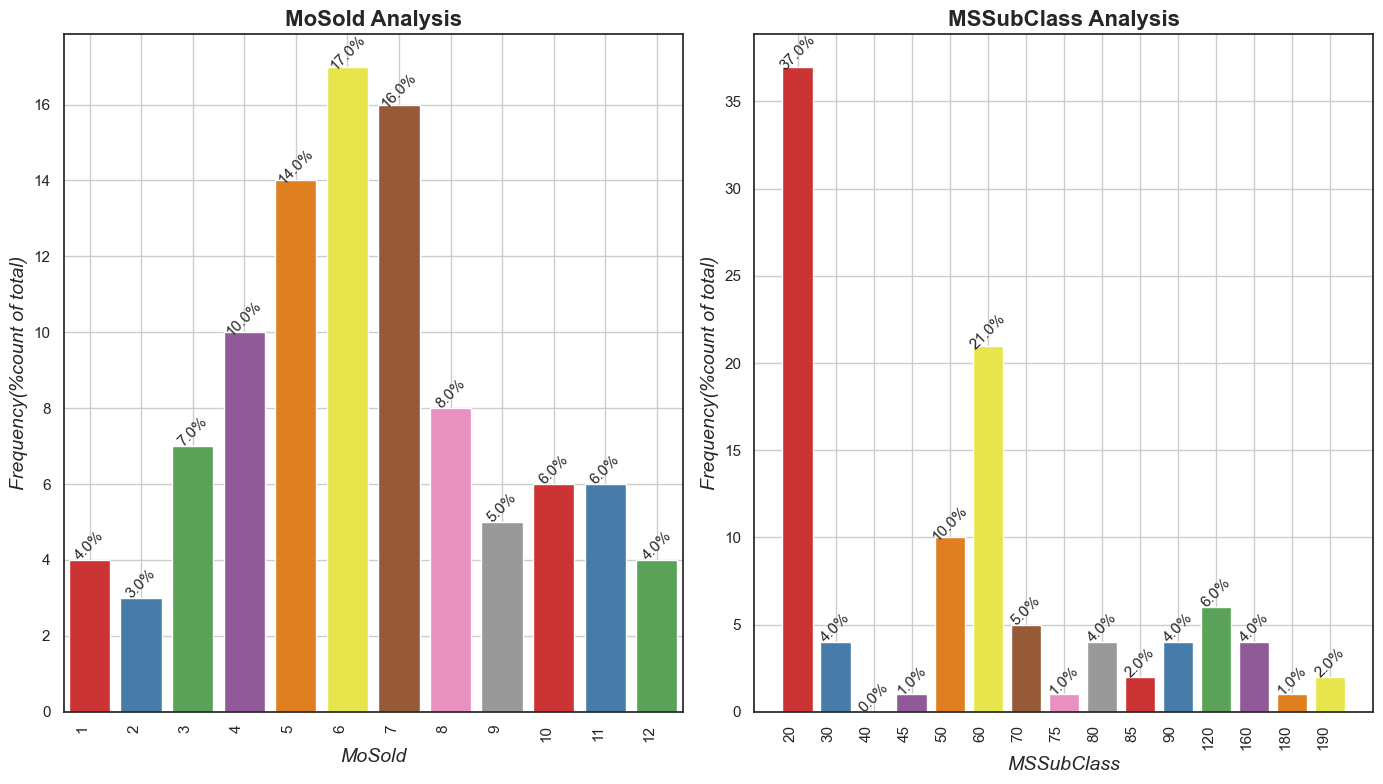

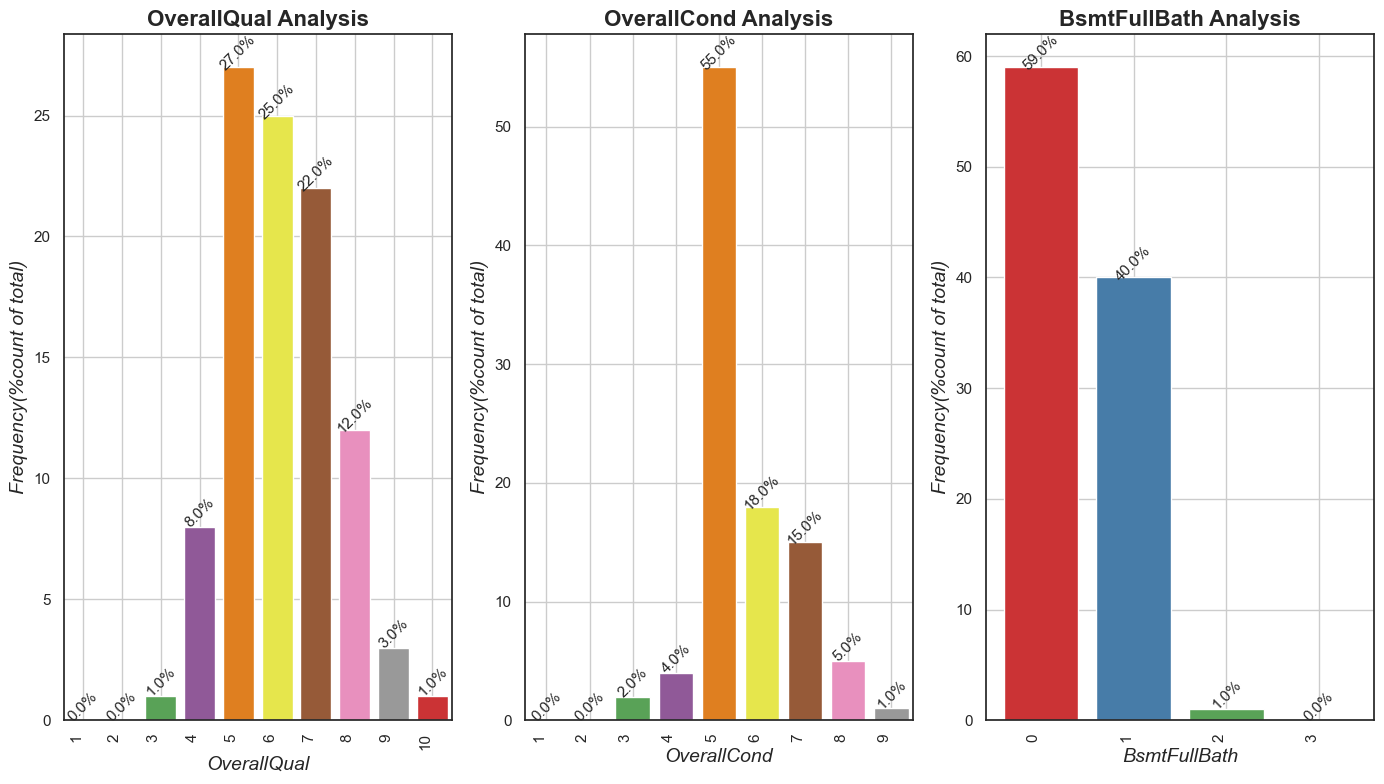

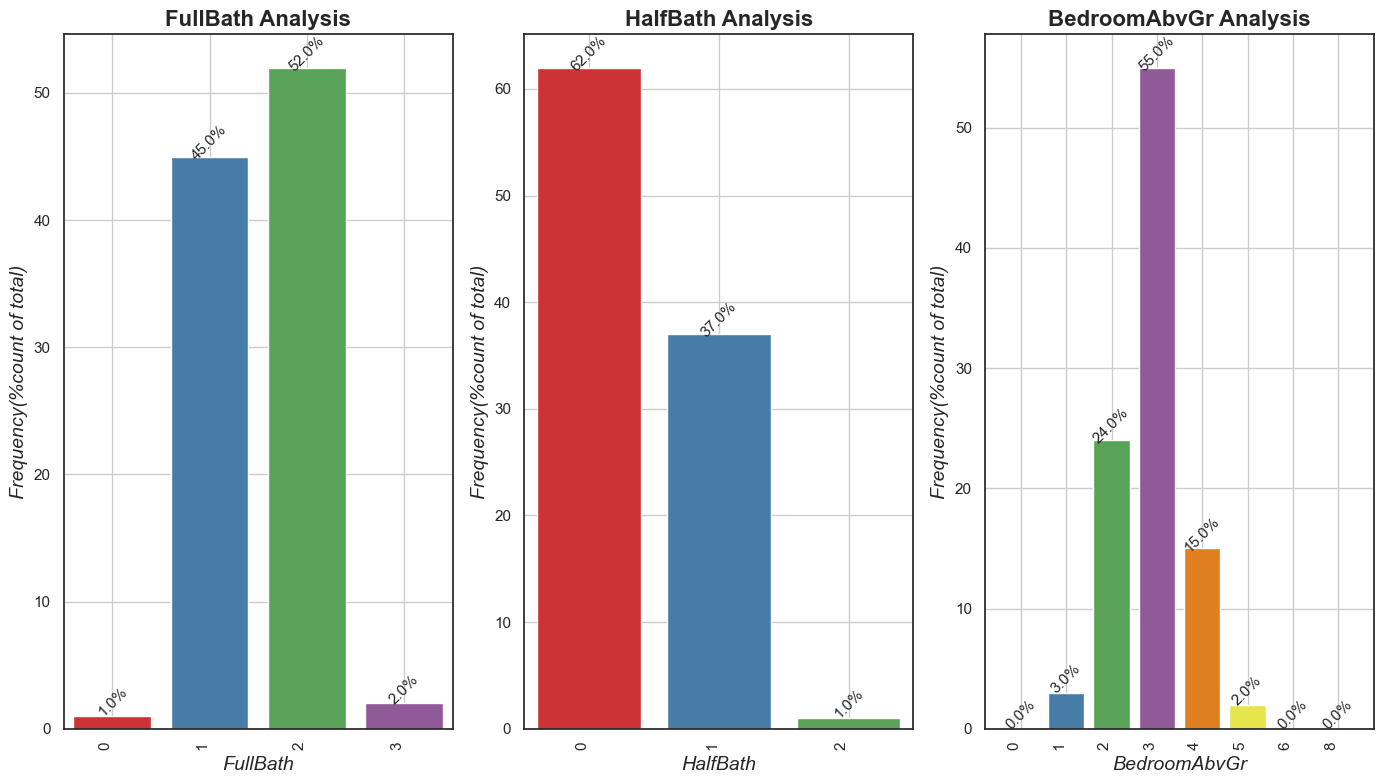

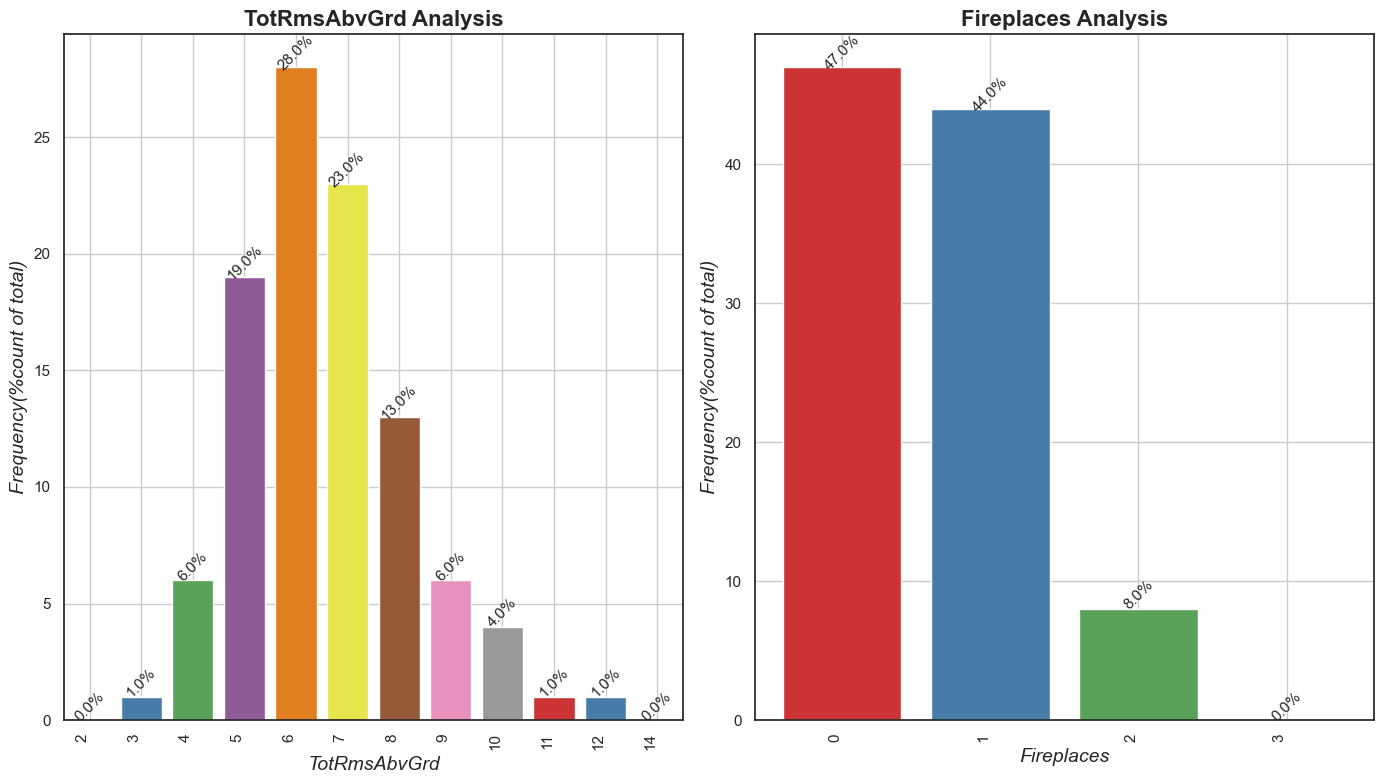

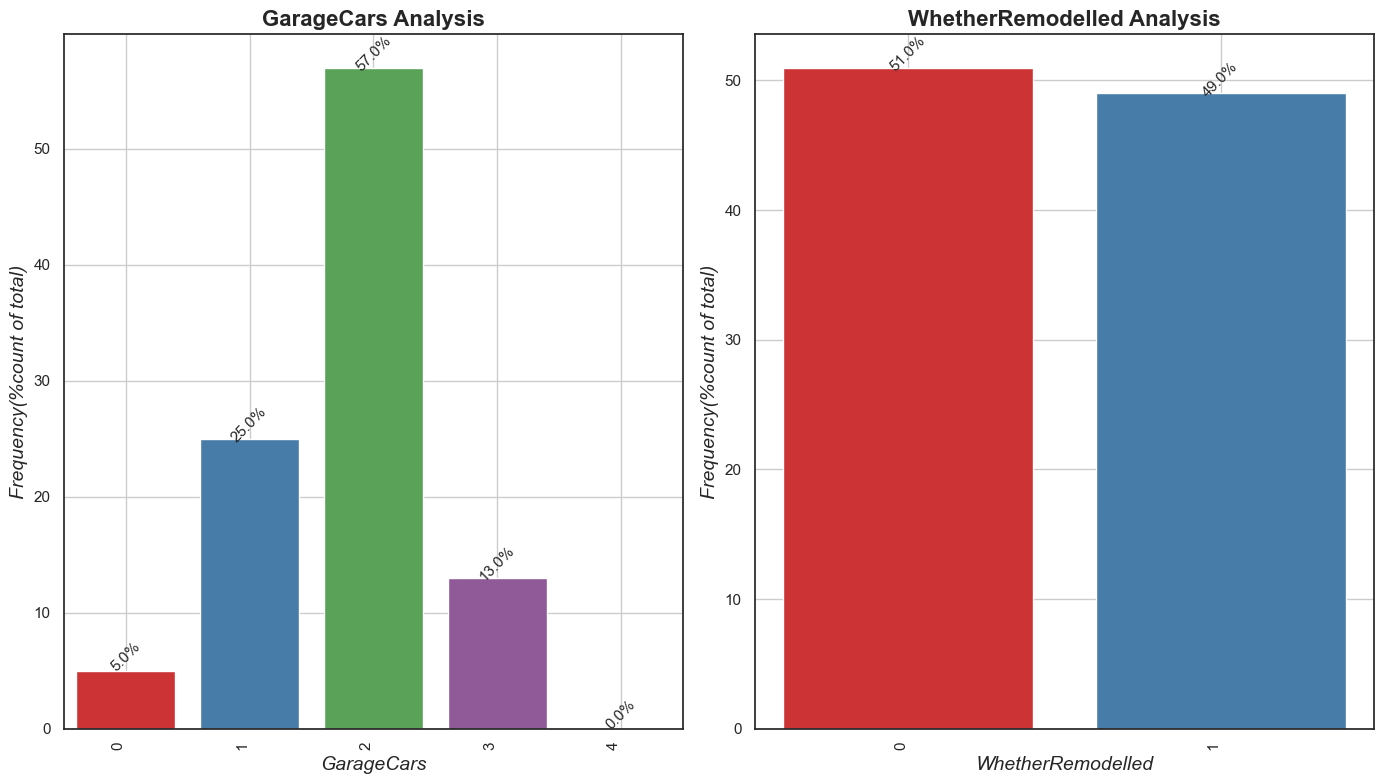

In [42]:
categorical_freq_prcnt_plt(df, 'MoSold', 'MSSubClass',0)
categorical_freq_prcnt_plt(df, 'OverallQual','OverallCond','BsmtFullBath')
categorical_freq_prcnt_plt(df, 'FullBath','HalfBath','BedroomAbvGr')
categorical_freq_prcnt_plt(df, 'TotRmsAbvGrd','Fireplaces',0)
categorical_freq_prcnt_plt(df, 'GarageCars','WhetherRemodelled',0)


Observations:
Most preferred choices:
(1) Month (House) Sold: June, followed by July and May
(2) MSSubClass: Most preferred type of dwelling involved is 20 i.e. 1-Story 1946 & Newer All Styles, followed by 60 i.e. 2-Story 1946 & Newer.
(3) Overall Quality (material and finish): Average and Above Average
(4) Overall Condition: Mostly Average, followed by Above Average
(5) (i) Basement Full Bathrooms: Maximum 0(None), followed by 1.
---(ii) Full Bathrooms: Preferred 2, followed by 1 and (iii) Half Bathrooms: Preferred 0(None), followed by 1.
(6) Bedrooms Above Ground:3, followed by 2.
(7) Total Rooms Above Ground: 6, followed by 7.
(8) No significant preferences for Fireplaces (0 0r 1) and WhetherRemodelled (House) or not.
(9) GarageCars space: 2 car spaces, followed by 1 car space.



In [43]:
##Removing 'Id' and 'MoSold' columns as they are trivial for our analysis
df = df.drop(['Id','MoSold'], axis=1)

# Outlier Treatment

In [44]:
#Check outliers
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.95,0.98,0.99,1])


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,WhetherRemodelled,AgeofProperty
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.767979,70.807363,10484.749144,6.104452,5.595890,102.895548,444.726027,569.721747,1061.095034,1169.860445,...,2.884418,6.542808,0.617295,1.776541,476.860445,96.206336,46.559932,181477.005993,0.488014,36.874144
std,41.940650,22.440317,8957.442311,1.390153,1.124343,182.203365,462.664785,449.375525,442.272249,391.161983,...,0.817229,1.598484,0.650575,0.745554,214.466769,126.158988,66.381023,79105.586863,0.500070,30.193130
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,0.000000
10%,20.000000,50.000000,5298.300000,5.000000,5.000000,0.000000,0.000000,60.700000,641.900000,765.000000,...,2.000000,5.000000,0.000000,1.000000,240.000000,0.000000,0.000000,107500.000000,0.000000,1.000000
25%,20.000000,60.000000,7621.500000,5.000000,5.000000,0.000000,0.000000,216.000000,799.000000,892.000000,...,2.000000,5.000000,0.000000,1.000000,338.000000,0.000000,0.000000,130375.000000,0.000000,8.000000
50%,50.000000,70.000000,9522.500000,6.000000,5.000000,0.000000,385.500000,474.000000,1005.500000,1096.500000,...,3.000000,6.000000,1.000000,2.000000,480.000000,0.000000,24.000000,163995.000000,0.000000,36.000000
75%,70.000000,79.250000,11515.500000,7.000000,6.000000,164.000000,714.500000,816.000000,1291.500000,1392.000000,...,3.000000,7.000000,1.000000,2.000000,576.000000,171.000000,70.000000,215000.000000,1.000000,54.000000
95%,160.000000,105.000000,17473.050000,8.000000,8.000000,449.950000,1281.300000,1468.000000,1752.650000,1836.200000,...,4.000000,10.000000,2.000000,3.000000,841.300000,341.300000,170.000000,325000.000000,1.000000,92.000000
98%,190.000000,121.660000,25062.700000,9.000000,8.000000,660.000000,1444.320000,1691.280000,2025.140000,2092.580000,...,4.660000,10.000000,2.000000,3.000000,903.300000,424.300000,239.320000,392330.000000,1.000000,99.660000


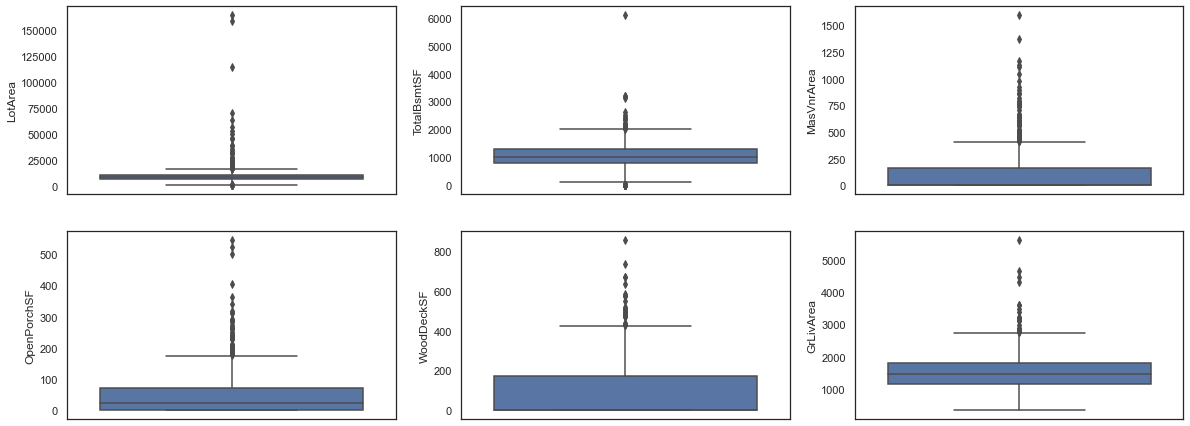

In [45]:
 #Check the outliers in all the numeric columns (boxplot)

plt.figure(figsize=(20, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', color='b', data = df)
plt.subplot(5,3,2)
sns.boxplot(y = 'TotalBsmtSF', color='b', data = df)
plt.subplot(5,3,3)
sns.boxplot(y = 'MasVnrArea', color='b', data = df)
plt.subplot(5,3,4)
sns.boxplot(y = 'OpenPorchSF', color='b', data = df)
plt.subplot(5,3,5)
sns.boxplot(y = 'WoodDeckSF', color='b', data = df)
plt.subplot(5,3,6)
sns.boxplot(y = 'GrLivArea', color='b', data = df)


plt.show()

In [46]:
df.shape

(1168, 45)

In [47]:
##Removing the Outliers
# Removing values beyond 98% for LotArea

q_LotArea = df['LotArea'].quantile(0.98)
df = df[df["LotArea"] < q_LotArea]


# Removing values beyond 99% for TotalBsmtSF
q_TotalBsmtSF = df['TotalBsmtSF'].quantile(0.99)
df = df[df["TotalBsmtSF"] < q_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

q_WoodDeckSF = df['WoodDeckSF'].quantile(0.99)
df = df[df["WoodDeckSF"] < q_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

q_OpenPorchSF = df['OpenPorchSF'].quantile(0.99)
df = df[df["OpenPorchSF"] < q_OpenPorchSF]

# Data Visualization

Visualising the Target Variable: SalePrice

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 176509.76 and sigma = 70390.70



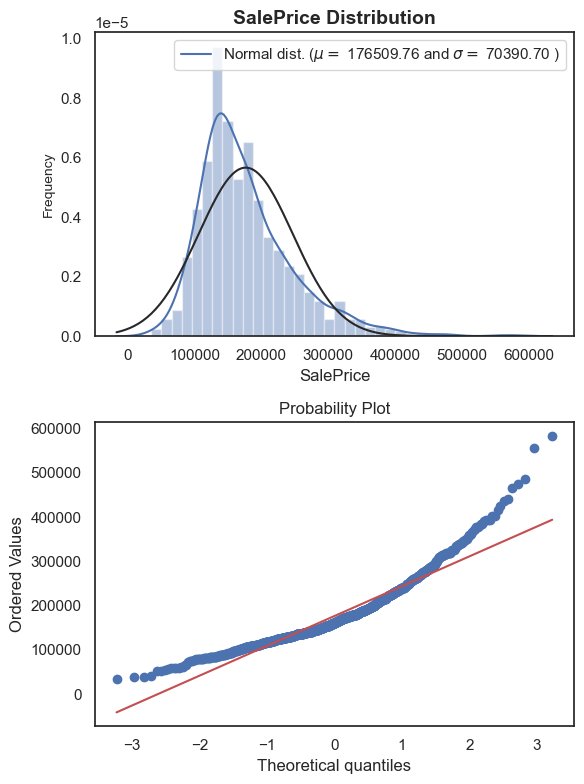

In [48]:
from scipy import stats
from scipy.stats import norm

plt.figure(figsize=(6,8), dpi=100)
plt.subplot(211)
sns.distplot(df['SalePrice'], fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency', fontsize=10)
plt.title('SalePrice Distribution', fontsize=14, fontweight='bold')

#Get also the QQ-plot
plt.subplot(212)
res = stats.probplot(df['SalePrice'], plot=plt)

plt.autoscale()
plt.tight_layout()
plt.show()

Observation: The points on the probplot don't lie along the red line. It shows the skewness in the data of the target variable. Hence, transforming the variable using log-transform.

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 12.01 and sigma = 0.38



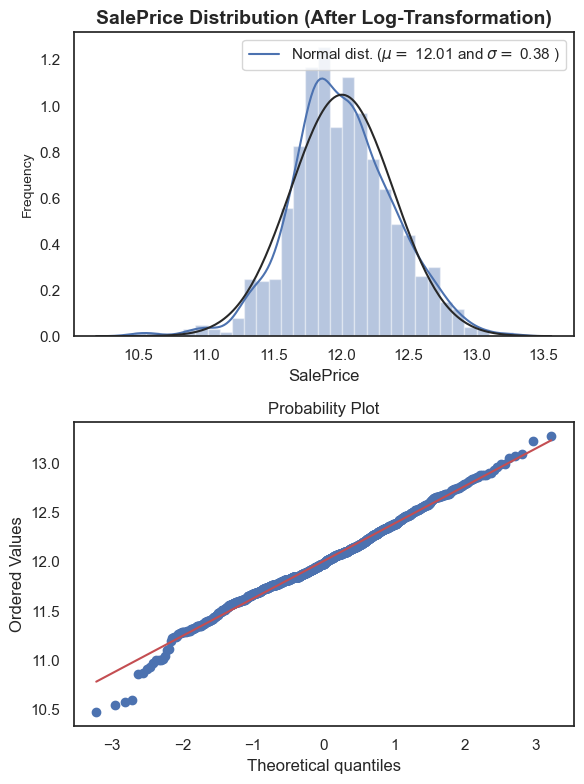

In [49]:

from scipy import stats
from scipy.stats import norm

##Using the numpy fuction log1p which that applies log(1+x) to all elements of the target variable column
df["SalePrice"] = np.log1p(df["SalePrice"])

plt.figure(figsize=(6,8), dpi=100)
plt.subplot(211)
sns.distplot(df['SalePrice'], fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency', fontsize=10)
plt.title("SalePrice Distribution (After Log-Transformation)", fontsize=14, fontweight='bold')

#Get also the QQ-plot
plt.subplot(212)
res = stats.probplot(df['SalePrice'], plot=plt)

plt.autoscale()
plt.tight_layout()
plt.show()

Observations:
(1) The normal distribution plot now shows that the new distribution of SalePrice (log-transformed) is almost normally distributed.
(2) The points on the probplot almost lie along the red line. It shows that the skewness issue in the data of the target variable, 'SalePrice' is almost resolved with some noise.

In [50]:
##Let's define a function to draw scatterplots to understand relationship between 'dependent' and 'numeric' variables.
#(For three scatterplots together)
def scatter_plt_3(a, b, c):
    plt.figure(figsize=(15,5), dpi=150)
    sns.set_style("white")
    #subplot (131)
    plt.subplot(1,3,1)
    plt.scatter(x= df[a], y= df['SalePrice'])
    plt.title(("Sale price vs "+a), fontweight='bold', fontsize=15)
    plt.xlabel(a, fontsize=13, fontstyle='italic')
    plt.ylabel('SalePrice', fontsize=13, fontstyle='italic')
    plt.grid(True)
    #subplot (132)
    plt.subplot(1,3,2)
    plt.scatter(x= df[b], y= df['SalePrice'])
    plt.title(("Sale price vs "+b), fontweight='bold', fontsize=15)
    plt.xlabel(b, fontsize=13, fontstyle='italic')
    plt.ylabel('SalePrice', fontsize=13, fontstyle='italic')
    plt.grid(True)
    #subplot (133)
    plt.subplot(1,3,3)
    plt.scatter(x= df[c], y= df['SalePrice'])
    plt.title(("Sale price vs "+c), fontweight='bold', fontsize=15)
    plt.xlabel(c, fontsize=13, fontstyle='italic')
    plt.ylabel('SalePrice', fontsize=13, fontstyle='italic')
    plt.grid(True)
    
    plt.autoscale()
    plt.tight_layout()
    plt.show()
    
##(For two scatterplots together)
def scatter_plt_2(a,b):
    sns.set_style("white")
    plt.figure(figsize=(10,5), dpi=150)
    #subplot(121)
    plt.subplot(121)
    plt.scatter(x= df[a], y= df['SalePrice'])
    plt.title(("Sale Price vs "+a), fontweight='bold', fontsize=15)
    plt.xlabel(a, fontsize=13, fontstyle='italic')
    plt.ylabel('SalePrice', fontsize=13, fontstyle='italic')
    plt.grid(True)
    #subplot(122)
    plt.subplot(122)
    plt.scatter(x= df[b], y= df['SalePrice'])
    plt.title(("Sale price vs "+b), fontweight='bold', fontsize=15)
    plt.xlabel(b, fontsize=13, fontstyle='italic')
    plt.ylabel('SalePrice', fontsize=13, fontstyle='italic')
    plt.grid(True)
    
    plt.autoscale()
    plt.tight_layout()
    plt.show()

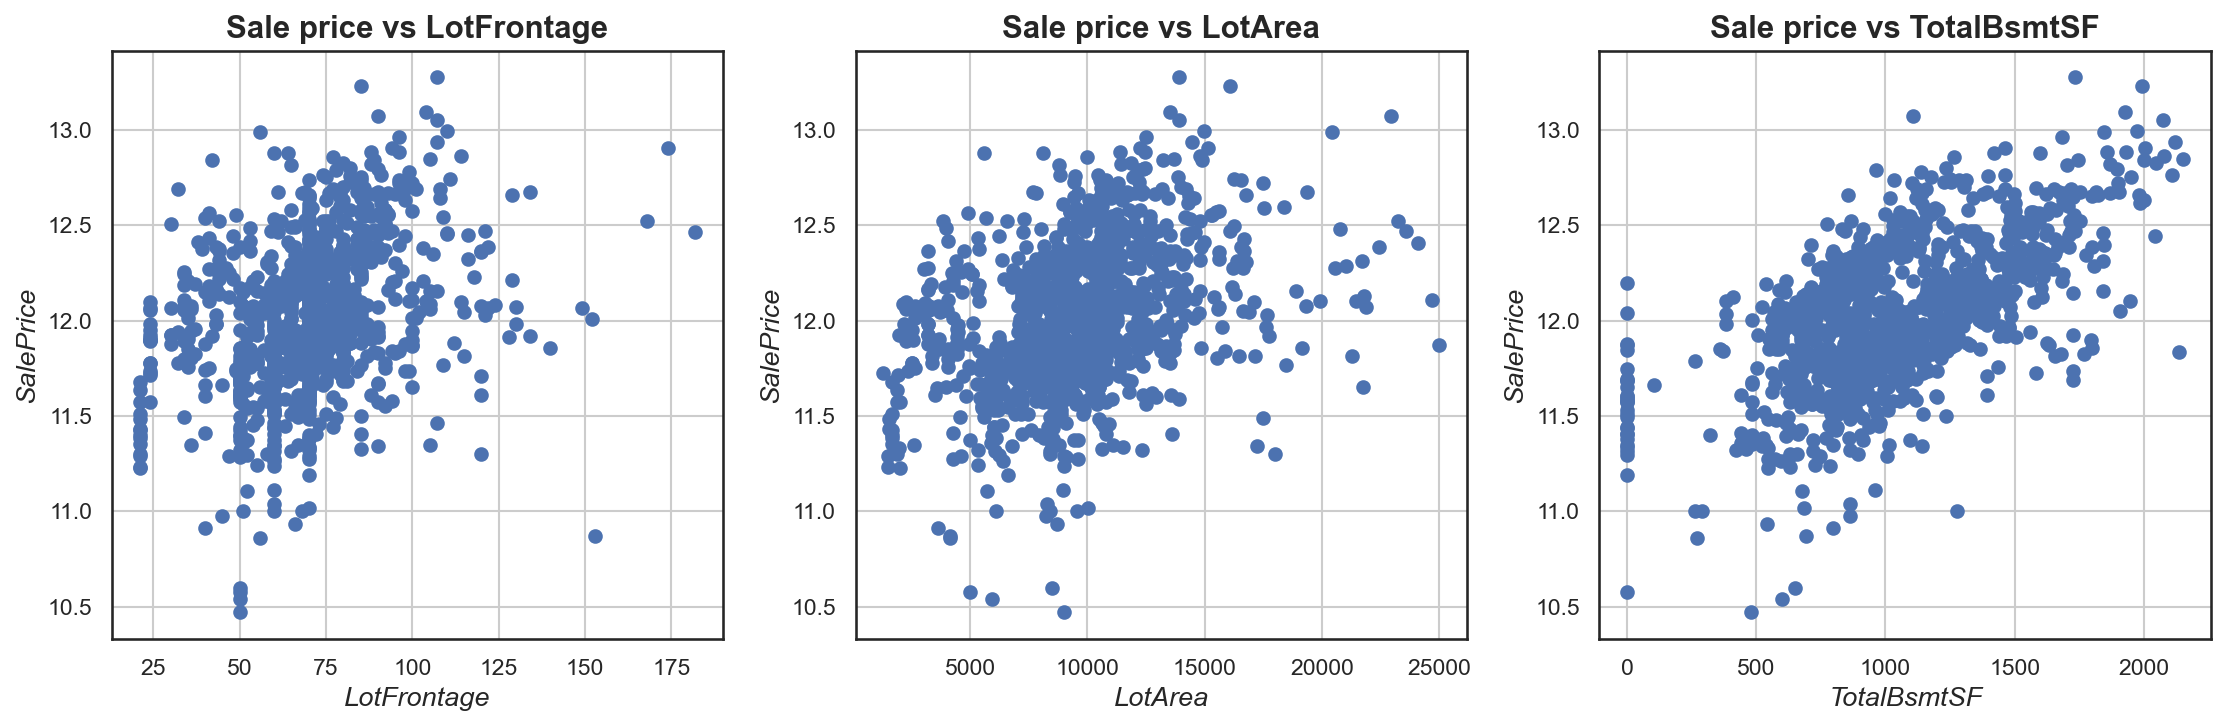

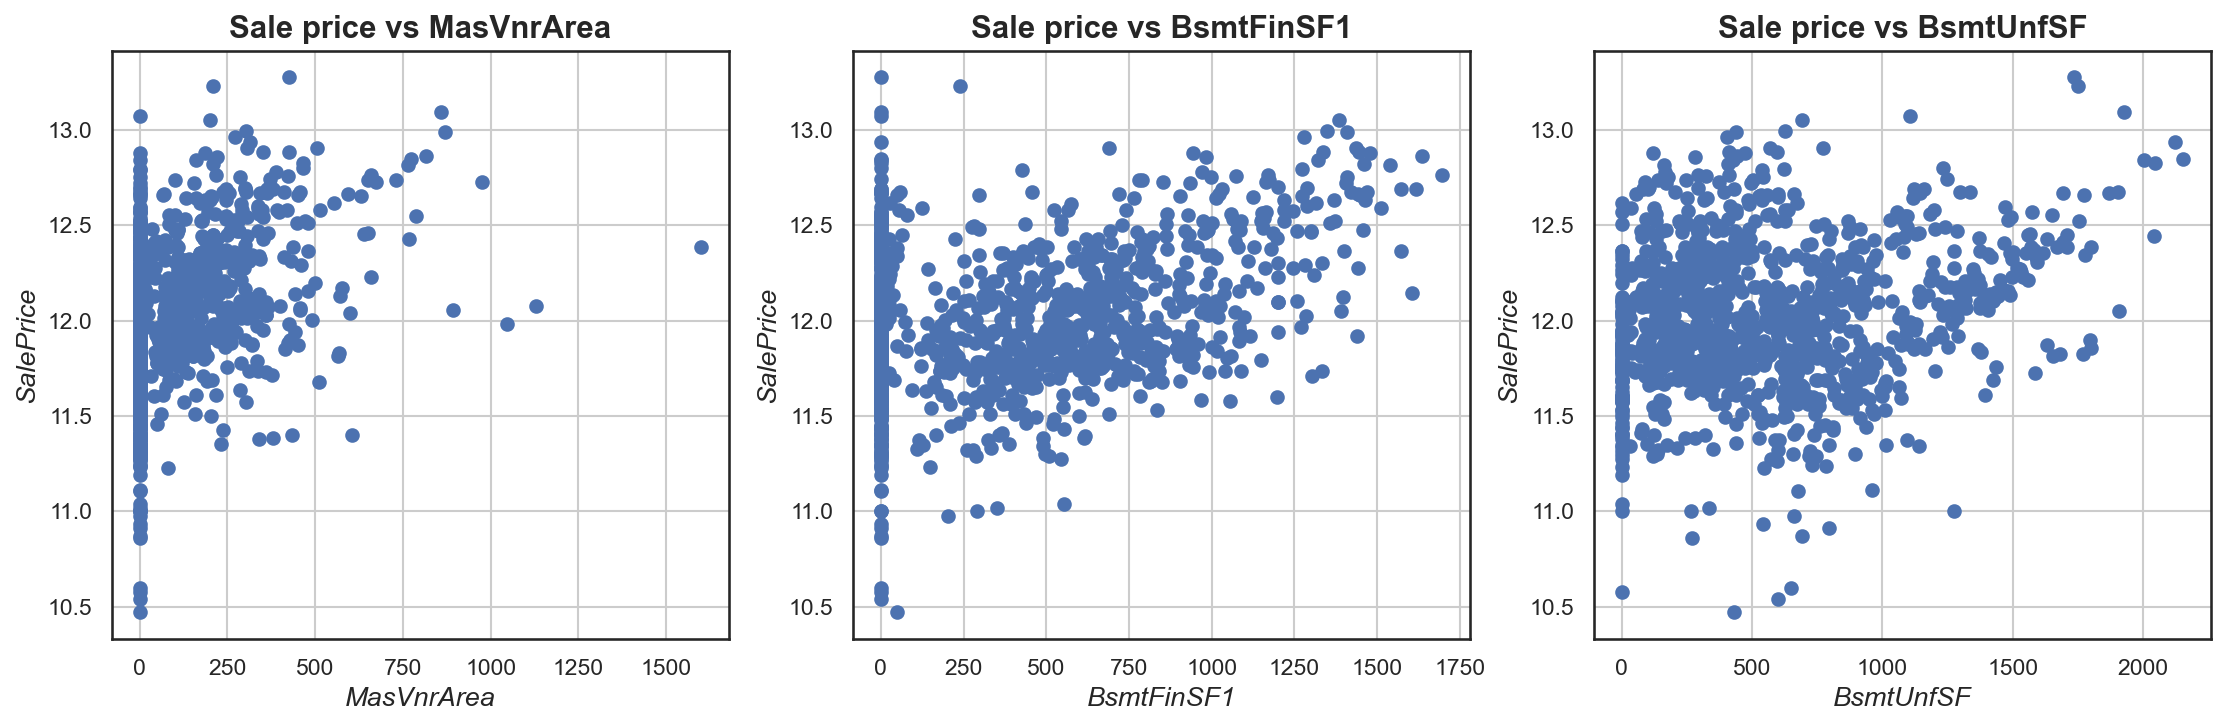

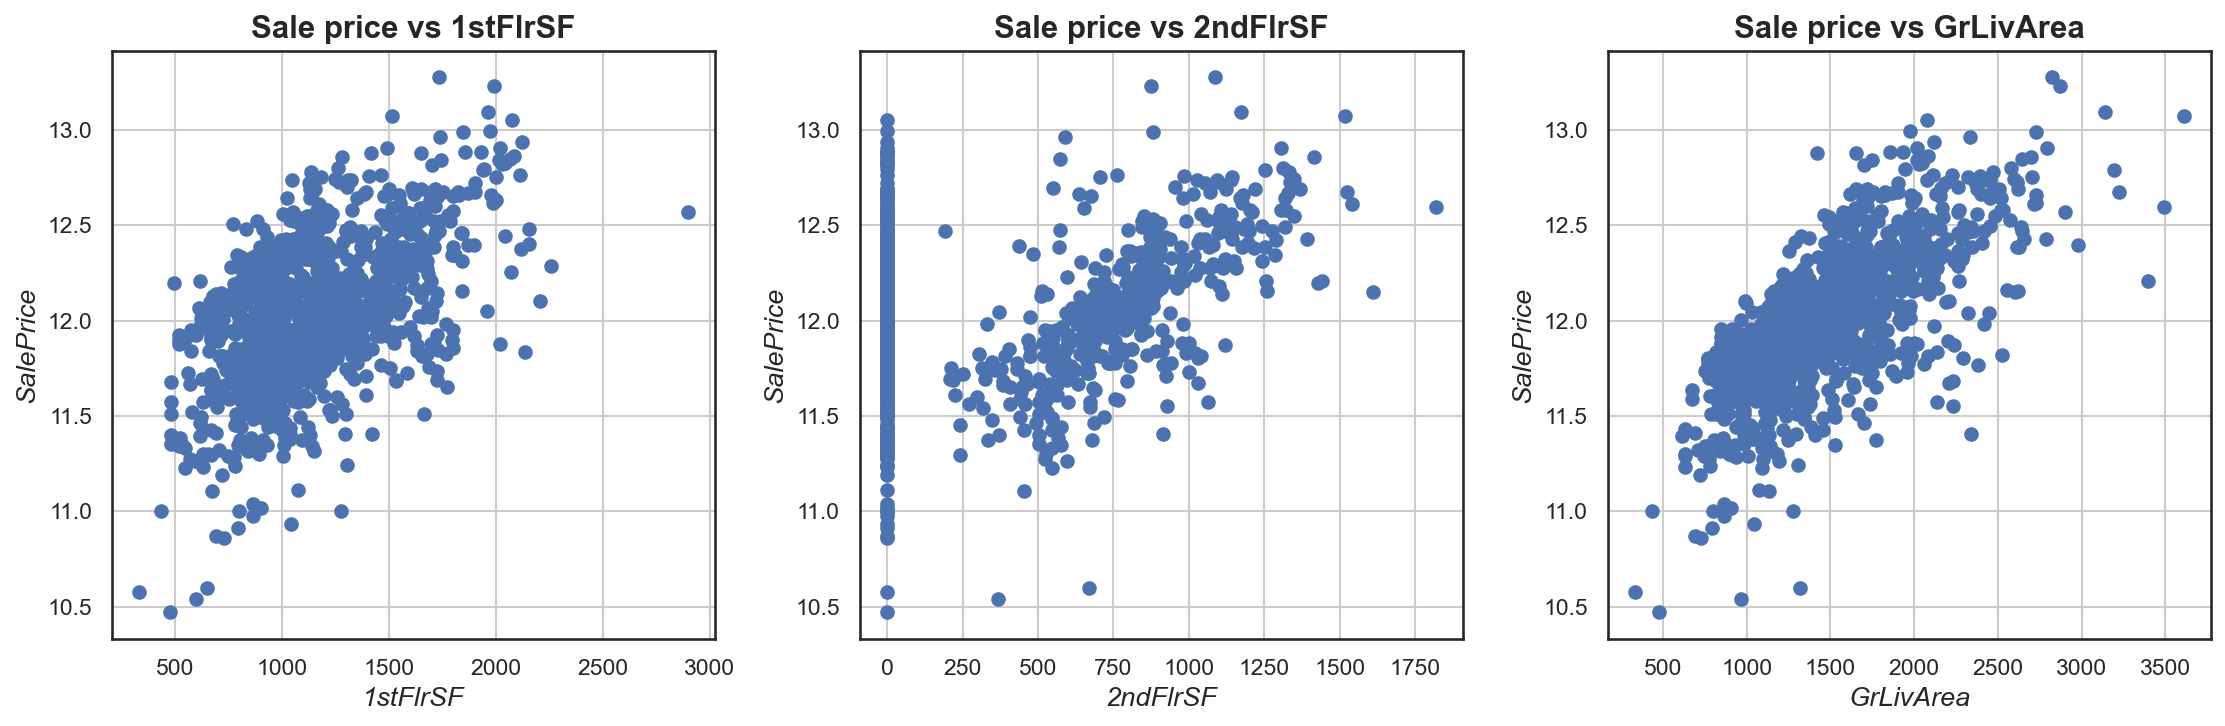

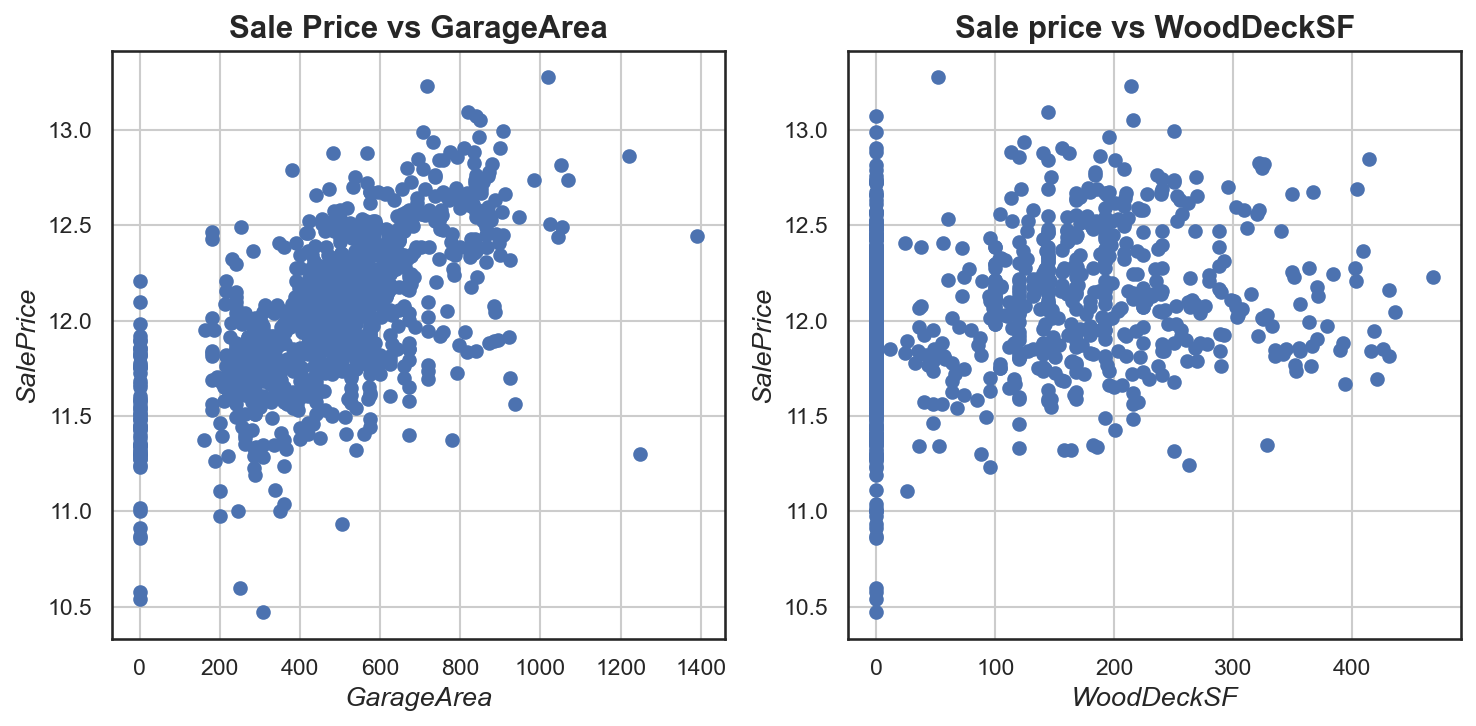

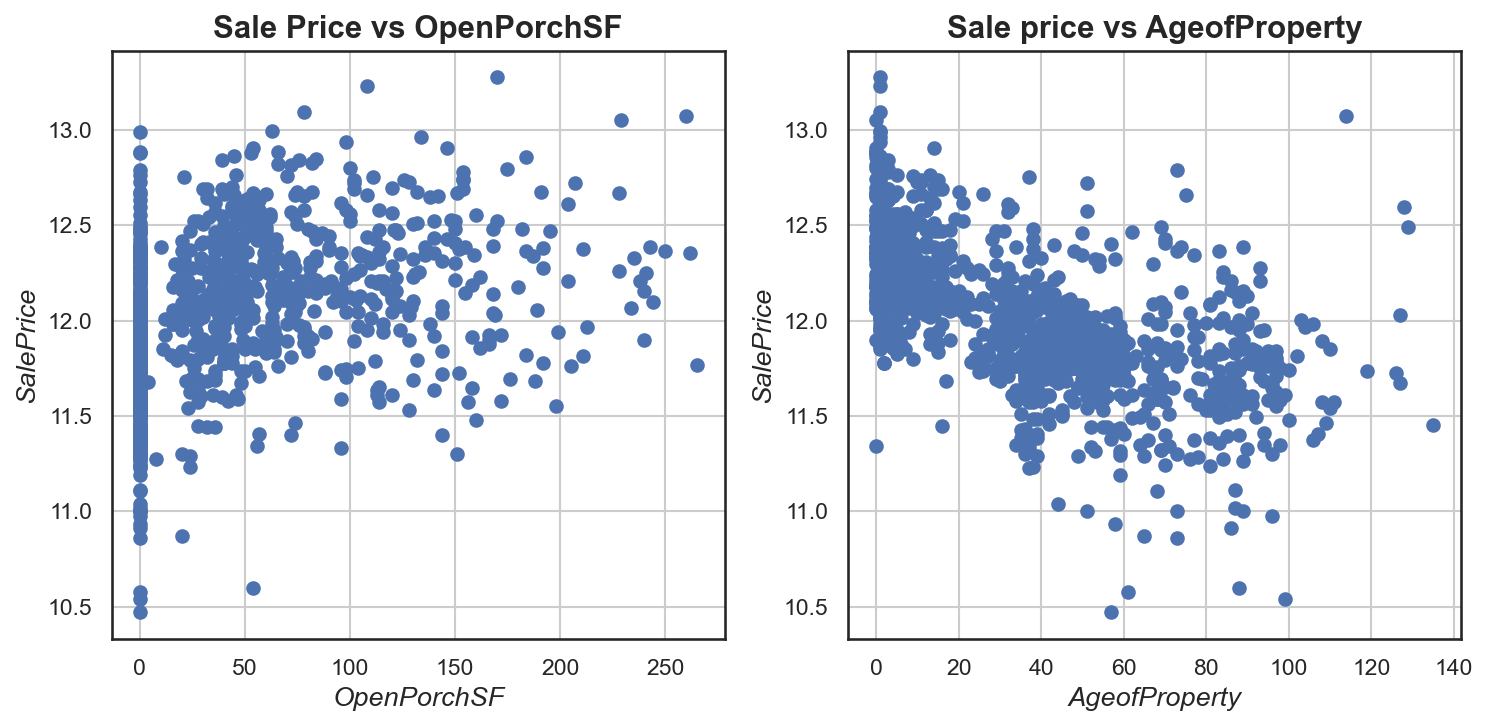

In [51]:
scatter_plt_3('LotFrontage', 'LotArea','TotalBsmtSF')
scatter_plt_3('MasVnrArea','BsmtFinSF1', 'BsmtUnfSF')
scatter_plt_3('1stFlrSF','2ndFlrSF', 'GrLivArea')
scatter_plt_2( 'GarageArea', 'WoodDeckSF')
scatter_plt_2('OpenPorchSF', 'AgeofProperty')

Observations
(1) '1stFlrSF','GrLivArea' show a positive correlation with the SalePrice.
(2) Other continuous variables are too scattered. Let's understand them from further analysis.
(3) SalePrice vs ('LotFrontage', 'MasVnrArea', '1stFlrSF', and 'GarageArea' scatterplots do have some datapoints with some eccentric values/outliers. Let's eliminate them first.

In [52]:
##Based on the 'LotFrontage', 'MasVnrArea', '1stFlrSF', and 'GarageArea' scatterplots w.r.t. SalePrice, eliminating some outlier datapoints 

df = df.loc[~((df['SalePrice']<11.0) & (df['LotFrontage']>150))]
df = df.loc[~((df['SalePrice']>12.0) & (df['MasVnrArea']>1500))]
df = df.loc[~((df['SalePrice']>12.0) & (df['1stFlrSF']>2500))]
df = df.loc[~((df['SalePrice']<12.5) & (df['GarageArea']>1200))]


<ipython-input-53-685d69bcbb5e>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_mask_1 = np.triu(np.ones_like(corr_matrix_new, dtype=np.bool))


<Figure size 1440x1200 with 0 Axes>

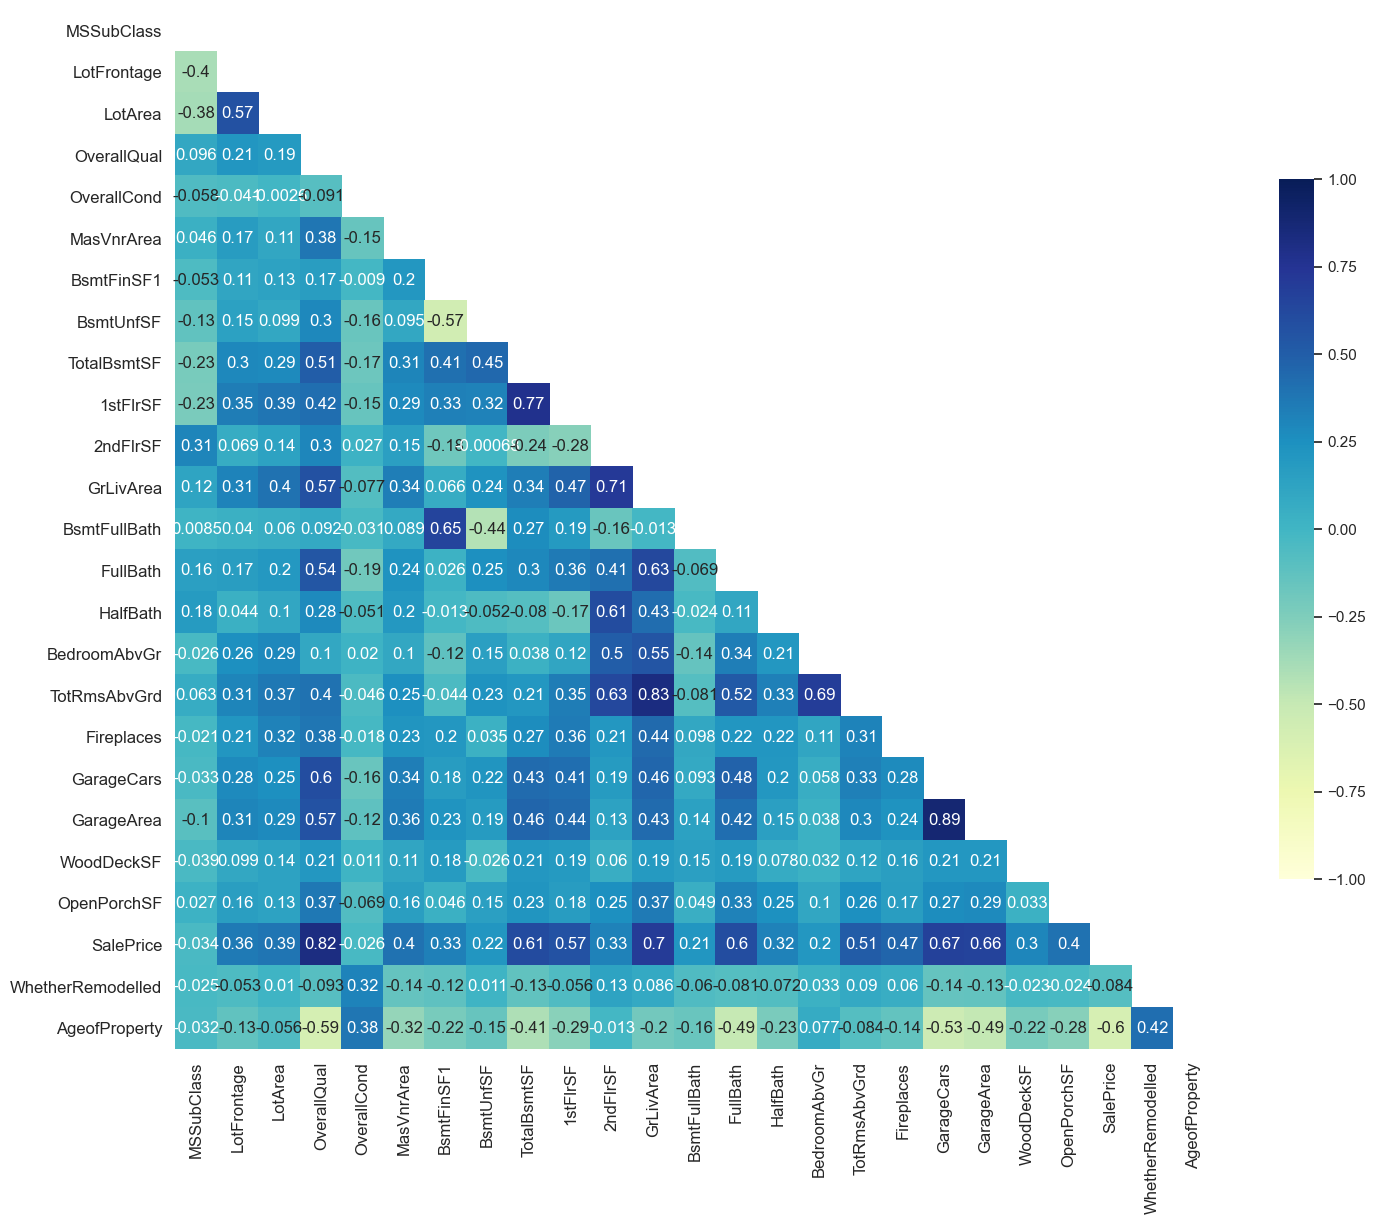

In [53]:
#Plotting a heatmap to understand correlation amongst numeric variables (ignore the categorical numeric ones)
numeric_vars= df.select_dtypes(include=['int32','float32','int64','float64']).columns
plt.figure(figsize = (12,10), dpi=120)
corr_matrix_new = df[numeric_vars].corr()
my_mask_1 = np.triu(np.ones_like(corr_matrix_new, dtype=np.bool))
f, ax_corr1 = plt.subplots(figsize=(15, 15), dpi=100)
ax_corr1 = sns.heatmap(corr_matrix_new, cmap= 'YlGnBu', cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,
            square=True, mask=my_mask_1, annot=True)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.autoscale()
plt.show()

Observations:
(1)The predictors 'GrLivArea' and 'TotRmsAbvGrd' shows (0.83) strong positive correlation. Hence, dropping 'TotRmsAbvGrd'.
(2)The predictors 'GarageCars' and 'GarageArea' shows (0.89) strong positive correlation. Hence, dropping 'GarageCars'.
(1)The predictors 'GrLivArea' and '2ndFlrSF' shows (0.71) strong positive correlation. Hence, dropping '2ndFlrSF'.
(2)The predictors '1stFlrSF' and 'TotalBsmtSF' shows (0.77) strong positive correlation. Hence, dropping '1stFlrSF'.

In [54]:
##Removing the highly correlated predictors to reduce multicollinearity.

df= df.drop(['TotRmsAbvGrd', 'GarageCars', '2ndFlrSF', '1stFlrSF'], axis = 1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,FireplaceQu,GarageType,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SalePrice,WhetherRemodelled,AgeofProperty
0,120,RL,70.0,4928,IR1,Inside,NPkVill,1Story,6,5,...,TA,Attchd,RFn,440,0,205,None,11.759793,0,31
2,60,RL,92.0,9920,IR1,CulDSac,NoRidge,2Story,7,5,...,TA,Attchd,Unf,455,180,130,None,12.505403,1,11
3,20,RL,105.0,11751,IR1,Inside,NWAmes,1Story,6,6,...,TA,Attchd,RFn,546,0,122,MnPrv,12.154785,0,33
4,20,RL,70.0,16635,IR1,FR2,NWAmes,1Story,6,7,...,TA,Attchd,Fin,529,240,0,None,12.278398,1,32
5,60,RL,58.0,14054,IR1,Inside,Gilbert,2Story,7,5,...,Gd,BuiltIn,Fin,660,100,17,None,12.297790,0,0


<ipython-input-55-8b39988586c5>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_mask_2 = np.triu(np.ones_like(corr_matrix_new1, dtype=np.bool))


<Figure size 1440x1200 with 0 Axes>

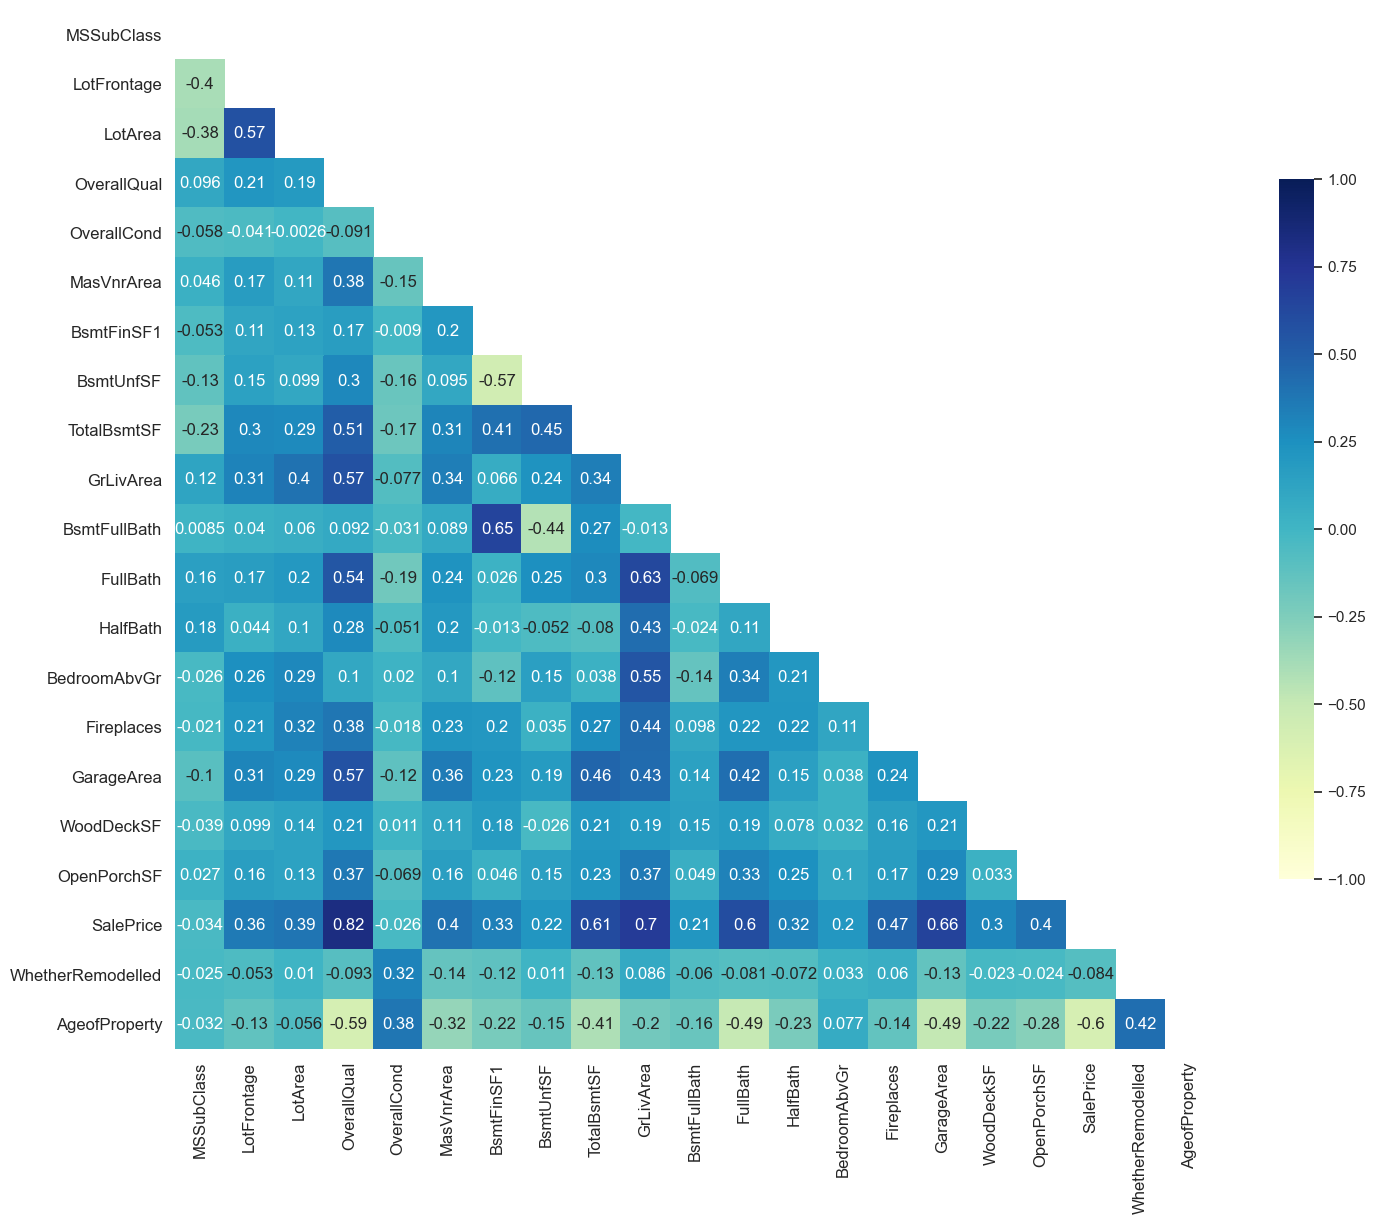

In [55]:
#Rechecking the heatmap to understand correlation amongst all numeric variables (ignore the categorical numeric ones)
numeric_vars1= df.select_dtypes(include=['int32','float32','int64','float64']).columns
plt.figure(figsize = (12,10), dpi=120)
corr_matrix_new1 = df[numeric_vars1].corr()
my_mask_2 = np.triu(np.ones_like(corr_matrix_new1, dtype=np.bool))
f, ax_corr2 = plt.subplots(figsize=(15, 15), dpi=100)
ax_corr2 = sns.heatmap(corr_matrix_new1, cmap= 'YlGnBu', cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,
            square=True, mask=my_mask_2, annot=True)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.autoscale()
plt.show()

In [56]:
df.shape

(1103, 41)

# Data Preparation

Using Data Dictionary, to convert the categorical variables into numeric variables

In [57]:
# Since the values of the following fields are ordered list, we shall assign values to them in sequence

# For values which can be ordered, we have given an ordered sequence value
# For values which cannot be ordered, we have categorised them into 0 and 1

##For ordinals, let's assign them their respective weights.
df['d_LotShape'] = df['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0}) #3 indicates better i.e. Regular LotShape
df['d_ExterQual'] = df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
df['d_BsmtQual'] = df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})

df['d_BsmtExposure'] = df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
df['d_BsmtFinType1'] = df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0})
df['d_HeatingQC'] = df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})

df['d_KitchenQual'] = df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_FireplaceQu'] = df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_GarageFinish'] = df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })

df = df.drop(['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', \
                                'KitchenQual', 'FireplaceQu', 'GarageFinish' ], axis=1)

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,...,AgeofProperty,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish
0,120,RL,70.0,4928,Inside,NPkVill,1Story,6,5,Gable,...,31,2,3,4,1,5,3,3,3,2
2,60,RL,92.0,9920,CulDSac,NoRidge,2Story,7,5,Gable,...,11,2,4,4,3,6,5,3,3,1
3,20,RL,105.0,11751,Inside,NWAmes,1Story,6,6,Hip,...,33,2,3,4,1,4,5,3,3,2
4,20,RL,70.0,16635,FR2,NWAmes,1Story,6,7,Gable,...,32,2,4,4,1,5,4,4,3,3
5,60,RL,58.0,14054,Inside,Gilbert,2Story,7,5,Gable,...,0,2,4,4,3,1,5,4,4,3


In [58]:
#Creating dummies for nominal variables


##Creating dummies for 'MSSubClass'
d_MSSubClass = pd.get_dummies(df['MSSubClass'], prefix='MSSubClass', drop_first = True)
df = pd.concat([df, d_MSSubClass], axis = 1)

##Creating dummies for 'LotConfigs'
d_LotConfigs = pd.get_dummies(df['LotConfig'], prefix='LotConfig', drop_first = True)
df = pd.concat([df, d_LotConfigs], axis = 1)

##Creating dummies for 'MSZoning'
d_MSZoning = pd.get_dummies(df['MSZoning'], prefix='MSZoning', drop_first = True)
df = pd.concat([df, d_MSZoning], axis = 1)

##Creating dummies for 'Neighborhood'
d_Neighborhood = pd.get_dummies(df['Neighborhood'], prefix='Neighborhood', drop_first = True)
df = pd.concat([df, d_Neighborhood], axis = 1)

##Creating dummies for 'Exterior2nd'
d_Exterior2nd = pd.get_dummies(df['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
df = pd.concat([df, d_Exterior2nd], axis = 1)

##Creating dummies for 'HouseStyle'
d_HouseStyle = pd.get_dummies(df['HouseStyle'], prefix='HouseStyle', drop_first = True)
df = pd.concat([df, d_HouseStyle], axis = 1)

##Creating dummies for 'Foundation'
d_Foundation = pd.get_dummies(df['Foundation'], prefix='Foundation', drop_first = True)
df = pd.concat([df, d_Foundation], axis = 1)

##Creating dummies for 'MasVnrType'
d_MasVnrType = pd.get_dummies(df['MasVnrType'], prefix='MasVnrTyp', drop_first = True)
df = pd.concat([df, d_MasVnrType], axis = 1)

##Creating dummies for 'RoofStyle'
d_RoofStyle = pd.get_dummies(df['RoofStyle'], prefix='RoofStyle', drop_first = True)
df = pd.concat([df, d_RoofStyle], axis = 1)

##Creating dummies for 'Exterior1st'
d_Exterior1st = pd.get_dummies(df['Exterior1st'], prefix='Exterior1st', drop_first = True)
df = pd.concat([df, d_Exterior1st], axis = 1)

##Creating dummies for 'GarageType'
d_GarageType = pd.get_dummies(df['GarageType'], prefix='GarageType', drop_first = True)
df = pd.concat([df, d_GarageType], axis = 1)


##Dropping columns for which we have created dummies, as we now have new columns derived from these columns
orig_before_dum_cols = ['MSSubClass','MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', \
              'GarageType',  'LotConfig' ,'HouseStyle', 'MasVnrType']
df = df.drop(orig_before_dum_cols, axis=1)

In [59]:
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,BsmtFullBath,...,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,70.0,4928,6,5,0.0,120,958,1078,958,0,...,0,0,0,0,1,0,0,0,0,0
2,92.0,9920,7,5,0.0,862,255,1117,2013,1,...,0,0,0,0,1,0,0,0,0,0
3,105.0,11751,6,6,480.0,705,1139,1844,1844,0,...,0,0,0,0,1,0,0,0,0,0
4,70.0,16635,6,7,126.0,1246,356,1602,1602,0,...,0,0,0,0,1,0,0,0,0,0
5,58.0,14054,7,5,0.0,0,879,879,1863,0,...,0,1,0,0,0,0,1,0,0,0


In [60]:
#Rechecking and eliminating those predictor variables that have a correlation of (threshold:-0.7 to 0.7) with other predictors.

df_corr = df.drop(['SalePrice'],axis =1)
my_corr_matrix = df_corr.corr().abs()
my_corr_matrix

upper_triangle = my_corr_matrix.where(np.triu(np.ones(my_corr_matrix.shape), k=1).astype(np.bool))
col_to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.70)]  #Reduces multicollinearity (if any)
col_to_drop  #columns to drop from df. Independent predictors highly correlated to each other

<ipython-input-60-a76e1174e4b5>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle = my_corr_matrix.where(np.triu(np.ones(my_corr_matrix.shape), k=1).astype(np.bool))


['d_ExterQual',
 'd_BsmtFinType1',
 'd_KitchenQual',
 'd_FireplaceQu',
 'MSZoning_RM',
 'Neighborhood_Somerst',
 'HouseStyle_1.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'Foundation_PConc',
 'MasVnrTyp_None',
 'RoofStyle_Hip',
 'Exterior1st_CemntBd',
 'Exterior1st_HdBoard',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_Stucco',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'GarageType_Detchd']

In [61]:
##Dropping independent predictors highly correlated to each other
df = df.drop(col_to_drop, axis=1)

In [62]:
df.shape

(1103, 108)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103 entries, 0 to 1167
Columns: 108 entries, LotFrontage to GarageType_None
dtypes: float64(3), int64(22), object(1), uint8(82)
memory usage: 321.0+ KB


We have converted all the columns to numeric.

In [64]:
##Creating a copy of this dataframe for 'Question 3'
df_new1 = df.copy()

In [65]:
#Creating a function to find binary value columns from the 'df' dataframe (if any)
def binary_val_cols(df):
    df_1 = df.copy()
    dualsvcol = (df_1.nunique()==2)
    list_dualsvcol = list(dualsvcol[dualsvcol.values==True].index)
    return list_dualsvcol

binary_cols = binary_val_cols(df)
print(binary_cols)

['WhetherRemodelled', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Ext

# Train test split

In [66]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, test_size = 0.3, random_state=100)

In [69]:
from sklearn.model_selection import train_test_split   #train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Lasso, Ridge #Ridge and Lasso Regression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error  #Evaluation Metrics

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

# Feature scaling

In [76]:
##Dataframe with binary columns
df_binary_train = df_train.loc[:, binary_cols]
df_binary_test = df_test.loc[:, binary_cols]

##Dropping binary dummy variables and we shall concat them later to preserve the scale
df_train = df_train.drop(binary_cols, axis=1)
df_test = df_test.drop(binary_cols, axis=1)

##StandardScaler

from sklearn.preprocessing import StandardScaler
all_cols = df_train.columns
scaler = StandardScaler()

#scaler fit_transform on train data
df_train[all_cols] = scaler.fit_transform(df_train[all_cols])
#concat dummies:Train set
df_train = pd.concat([df_train, df_binary_train], axis=1)

#scaler transform on test data
df_test[all_cols] = scaler.transform(df_test[all_cols])
#concat dummies: Test set
df_test = pd.concat([df_test, df_binary_test], axis=1)

KeyError: "None of [Index(['WhetherRemodelled', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45',\n       'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75',\n       'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120',\n       'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190',\n       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',\n       'LotConfig_Inside', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',\n       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',\n       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',\n       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',\n       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',\n       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',\n       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',\n       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr',\n       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Exterior2nd_AsphShn',\n       'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd',\n       'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd',\n       'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_Stone',\n       'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng',\n       'Exterior2nd_Wd Shng', 'HouseStyle_1Story', 'HouseStyle_2.5Fin',\n       'HouseStyle_2.5Unf', 'Foundation_CBlock', 'Foundation_Slab',\n       'Foundation_Stone', 'Foundation_Wood', 'MasVnrTyp_BrkFace',\n       'MasVnrTyp_Stone', 'RoofStyle_Gable', 'RoofStyle_Gambrel',\n       'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_AsphShn',\n       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_ImStucc',\n       'Exterior1st_Stone', 'Exterior1st_WdShing', 'GarageType_Attchd',\n       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',\n       'GarageType_None'],\n      dtype='object')] are in the [columns]"

In [72]:
print(df_train.shape)
print(df_test.shape)

(772, 25)
(331, 25)


In [73]:
##Storing target variable to y_train and y_test respectively

y_train = df_train['SalePrice']
y_test = df_test['SalePrice']

In [74]:
##Storing all feature variables to X_train and X_test
X_train = df_train.drop('SalePrice',axis=1)
X_test = df_test.drop('SalePrice',axis=1)


# Recursive Feature Elimination

Since there are around 108 features, we will use RFE to get the best 50 features out of the 108 features and use the new features for further analysis.

In [75]:
##Running RFE with the output number of the variable equal to 50
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 50)             # running RFE
rfe = rfe.fit(X_train, y_train)

ValueError: could not convert string to float: 'MnPrv'

In [81]:
from sklearn import linear_model
from sklearn import ensemble

#lr =  ensemble.RandomForestRegressor(n_estimators = 100, oob_score = True, n_jobs = -1,random_state =50,max_features = "sqrt", min_samples_leaf = 50)
#lr = linear_model.LinearRegression()
lr = ensemble.GradientBoostingRegressor()
#lr = linear_model.TheilSenRegressor()
#lr = linear_model.RANSACRegressor(random_state=50)

In [82]:
model = lr.fit(X_train, y_train)

ValueError: could not convert string to float: 'MnPrv'